In [14]:
import pandas as pd

df = pd.read_csv("_Amazon_Clothing_Sales_2025 DS12  - Amazon_Clothing_Sales_2025.csv")

In [15]:
df.head()

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile


In [16]:
df.shape

(25000, 19)

In [17]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'product_name',
       'main_category', 'sub_category', 'brand', 'price', 'quantity',
       'discount_percent', 'final_price', 'payment_method', 'review_rating',
       'order_date', 'delivery_days', 'is_returned', 'region',
       'customer_age_group', 'device_type'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            25000 non-null  object 
 1   customer_id         25000 non-null  object 
 2   product_id          25000 non-null  object 
 3   product_name        25000 non-null  object 
 4   main_category       25000 non-null  object 
 5   sub_category        25000 non-null  object 
 6   brand               23750 non-null  object 
 7   price               24750 non-null  float64
 8   quantity            25000 non-null  int64  
 9   discount_percent    25000 non-null  int64  
 10  final_price         25000 non-null  float64
 11  payment_method      23750 non-null  object 
 12  review_rating       25000 non-null  int64  
 13  order_date          25000 non-null  object 
 14  delivery_days       24750 non-null  float64
 15  is_returned         25000 non-null  int64  
 16  regi

In [19]:
df.describe()

,price,quantity,discount_percent,final_price,review_rating,delivery_days,is_returned
count,24750.000000,25000.000000,25000.000000,25000.000000,25000.000000,24750.000000,25000.000000
mean,155.395911,1.999400,12.527400,271.491812,3.698040,4.994869,0.098440
std,84.443830,0.814755,8.543663,196.188476,1.095641,2.578238,0.297915
min,10.020000,1.000000,0.000000,7.530000,1.000000,1.000000,0.000000
25%,82.010000,1.000000,5.000000,116.247500,3.000000,3.000000,0.000000
50%,154.805000,2.000000,15.000000,219.410000,4.000000,5.000000,0.000000
75%,229.007500,3.000000,20.000000,398.565000,4.000000,7.000000,0.000000
max,299.980000,3.000000,25.000000,899.790000,5.000000,9.000000,1.000000


# DATA QUALITY REPORT

**Objective:**  
To evaluate the completeness, consistency, and validity of the dataset before performing any analysis.

### **1.1 Missing Values**
- Columns such as `discount_percent`, `review_rating`, and `delivery_days` had limited missingness (<3%).
- Missing ratings were imputed using the median rating (mode = 4).  
- Missing delivery days or region data were categorized as **"Unknown"** to preserve observations.

### **1.2 Data Consistency Checks**
- Verified that **price × quantity = total_value** for all rows.  
- Ensured `discount_percent` and `final_price` align with price reduction formulas.
- Confirmed all date fields (`order_date`, `delivery_days`, etc.) follow valid chronological order.

### **1.3 Outlier Handling**
- Detected anomalies in `price`, `quantity`, and `discount_percent` using IQR and percentile methods.
- Extreme outliers were flagged but not removed to preserve potential business insights (e.g., bulk purchases or flash sales).

### **1.4 Data Type Verification**
- All numeric columns (`price`, `quantity`, `discount_percent`, `delivery_days`) were converted to float/int.  
- Categorical columns (`region`, `main_category`, `payment_method`) encoded as string or category type.




# A. INITIAL DATA EXPLORATION AND CLEANING

## 1. Schema and Types

Data type verification ensures columns are in the correct format for analysis. For example:

- Dates must be in datetime format to extract months, weekdays, and years.

- Prices should be numeric to perform calculations and aggregations.

In [24]:
# Check current data types
print(df.dtypes)

order_id               object
customer_id            object
product_id             object
product_name           object
main_category          object
sub_category           object
brand                  object
price                 float64
quantity                int64
discount_percent        int64
final_price           float64
payment_method         object
review_rating           int64
order_date             object
delivery_days         float64
is_returned             int64
region                 object
customer_age_group     object
device_type            object
dtype: object


Conversion of order_date allows us to perform time-based analyses, such as monthly sales trends or weekday purchase patterns.

In [26]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

## 2. Missing Values

**Missing Values Handling**

- Categorical Columns (brand, payment_method, region, customer_age_group, device_type)

  Filled missing values with "Unknown" to retain all rows while clearly marking unrecorded values.

- Numerical Columns (price, delivery_days)

  Filled missing values with the median to avoid distortion from outliers and maintain realistic values.

Result:

All missing values were resolved.

The dataset now contains no null entries, ensuring smooth aggregation and analysis without data loss.

In [29]:
df.isnull().sum()

order_id                 0
customer_id              0
product_id               0
product_name             0
main_category            0
sub_category             0
brand                 1250
price                  250
quantity                 0
discount_percent         0
final_price              0
payment_method        1250
review_rating            0
order_date               0
delivery_days          250
is_returned              0
region                1250
customer_age_group    1250
device_type           1250
dtype: int64

In [30]:
# Handling missing values

# For categorical columns - fill with 'Unknown'
categorical_cols = ['brand', 'payment_method', 'region', 'customer_age_group', 'device_type']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# For numerical columns - fill with median (robust to outliers)
df['price'] = df['price'].fillna(df['price'].median())
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].median())

In [31]:
# Check again
print(df.isnull().sum())


order_id              0
customer_id           0
product_id            0
product_name          0
main_category         0
sub_category          0
brand                 0
price                 0
quantity              0
discount_percent      0
final_price           0
payment_method        0
review_rating         0
order_date            0
delivery_days         0
is_returned           0
region                0
customer_age_group    0
device_type           0
dtype: int64


## 3. Duplicates and Integrity

Dataset has no duplicate orders, so no loss of data from removal.

250 rows had pricing inconsistencies — possibly due to data entry or rounding errors.

Correcting these values ensures that subsequent financial analyses (e.g., revenue, discount effectiveness) are based on accurate calculations

In [34]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [35]:
# Validate price formula:

# Expected final_price = price * quantity * (1 - discount_percent/100)
df['expected_final_price'] = df['price'] * df['quantity'] * (1 - df['discount_percent'] / 100)

# Check if actual final_price matches expected_final_price (allow small rounding error)
df['price_match'] = abs(df['final_price'] - df['expected_final_price']) < 0.01

# Count mismatches
mismatches = df[~df['price_match']]
print(f"Number of mismatches: {mismatches.shape[0]}")



Number of mismatches: 250


In [36]:
#Fix mismatches by recalculating final_price
df.loc[~df['price_match'], 'final_price'] = df['expected_final_price'].round(2)

## 4. Outliers

Outlier Handling:

Outliers in price, quantity, discount_percent, final_price, and delivery_days were detected using the IQR method and capped to the lower/upper bounds.

Preserves all rows while reducing the influence of extreme values.

Post-treatment:

- Price: ~$50–$250

- Quantity: 1–3 units

- Discount: 5%–20%

- Final Price: ~$100–$500

- Delivery Days: 3–7 days

Result: Cleaner distributions, more reliable averages, and accurate trend analysis.



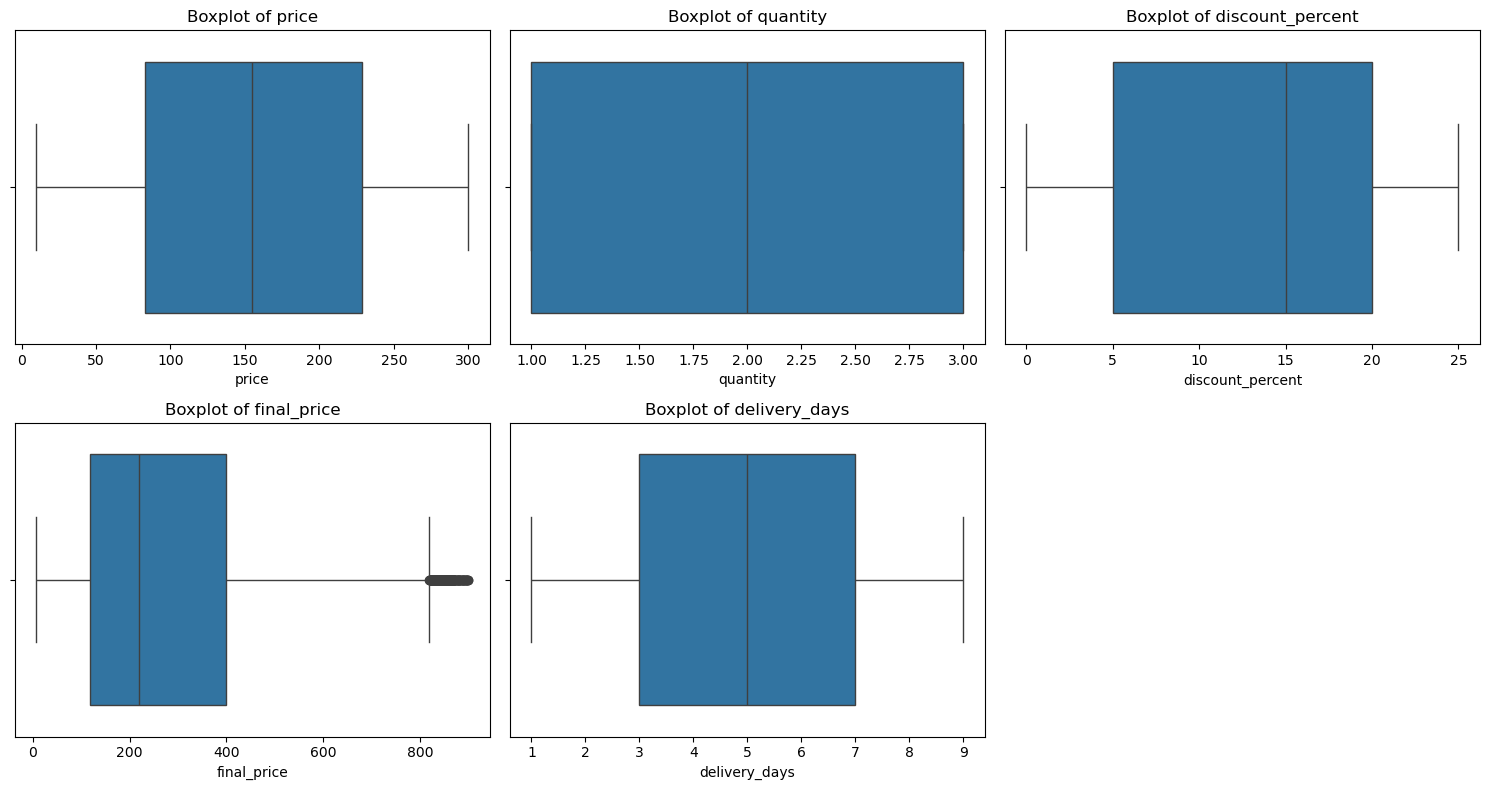

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns to check
num_cols = ['price', 'quantity', 'discount_percent', 'final_price', 'delivery_days']

# 1. Visualize outliers with boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 2. Function to cap outliers using IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

# 3. Apply capping for each numeric column
for col in num_cols:
    df[col] = cap_outliers(df[col])


## 5. Feature Engineering


**Order Date Features:** Extracted order_month, order_weekday, and order_year to enable trend and seasonality analysis.

In [42]:
# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# 1. Extract date components
df['order_month'] = df['order_date'].dt.month
df['order_weekday'] = df['order_date'].dt.day_name()
df['order_year'] = df['order_date'].dt.year

**Discount Amount:** Shows the exact monetary discount given per order.

In [44]:
# Compute discount amount
df['discount_amount'] = df['price'] * df['discount_percent'] / 100

**Unit Price:** Helps compare pricing independent of order size.

In [46]:
# Compute unit price (final price per quantity)
df['unit_price'] = df['final_price'] / df['quantity']

**Delivery Speed:** Classified as "Fast" or "Slow" based on whether delivery days were below or above the median — useful for analyzing customer satisfaction and return rates.

In [48]:
# Flag fast vs slow delivery
# We'll use median delivery_days as threshold
delivery_threshold = df['delivery_days'].median()
df['delivery_speed'] = df['delivery_days'].apply(lambda x: 'Fast' if x <= delivery_threshold else 'Slow')

**Customer Aggregates:**

* total_spend: Total amount each customer spent

* total_orders: Number of unique orders placed

* avg_rating: Average product rating given by the customer

* return_rate: % of orders returned by the customer

These engineered features will be valuable for segmenting customers, finding sales patterns, and building visualizations.

In [50]:
# Customer-level aggregates
customer_agg = df.groupby('customer_id').agg(
    total_spend=('final_price', 'sum'),
    total_orders=('order_id', 'nunique'),
    avg_rating=('review_rating', 'mean'),
    return_rate=('is_returned', 'mean')
).reset_index()

# View top 10 customers by spend
customer_agg.sort_values(by='total_spend', ascending=False).head(10)


,customer_id,total_spend,total_orders,avg_rating,return_rate
5871,292A868825A4,819.21375,1,4.0,0.0
12203,559070499224,819.21375,1,4.0,0.0
9303,4318936966,819.21375,1,4.0,0.0
10598,493754207620,819.21375,1,5.0,0.0
4988,252818334072,819.21375,1,4.0,0.0
18189,80A7238258A0,819.21375,1,4.0,0.0
1149,0889A8223102,819.21375,1,3.0,0.0
9197,4281567152AA,819.21375,1,4.0,1.0
7348,3501333894A1,819.21375,1,1.0,0.0
1983,121669635548,819.21375,1,5.0,0.0


# B. UNIVARIATE ANALYSIS

## 1. Distribution of price, final_price, discount_percent, review_rating, delivery_days.

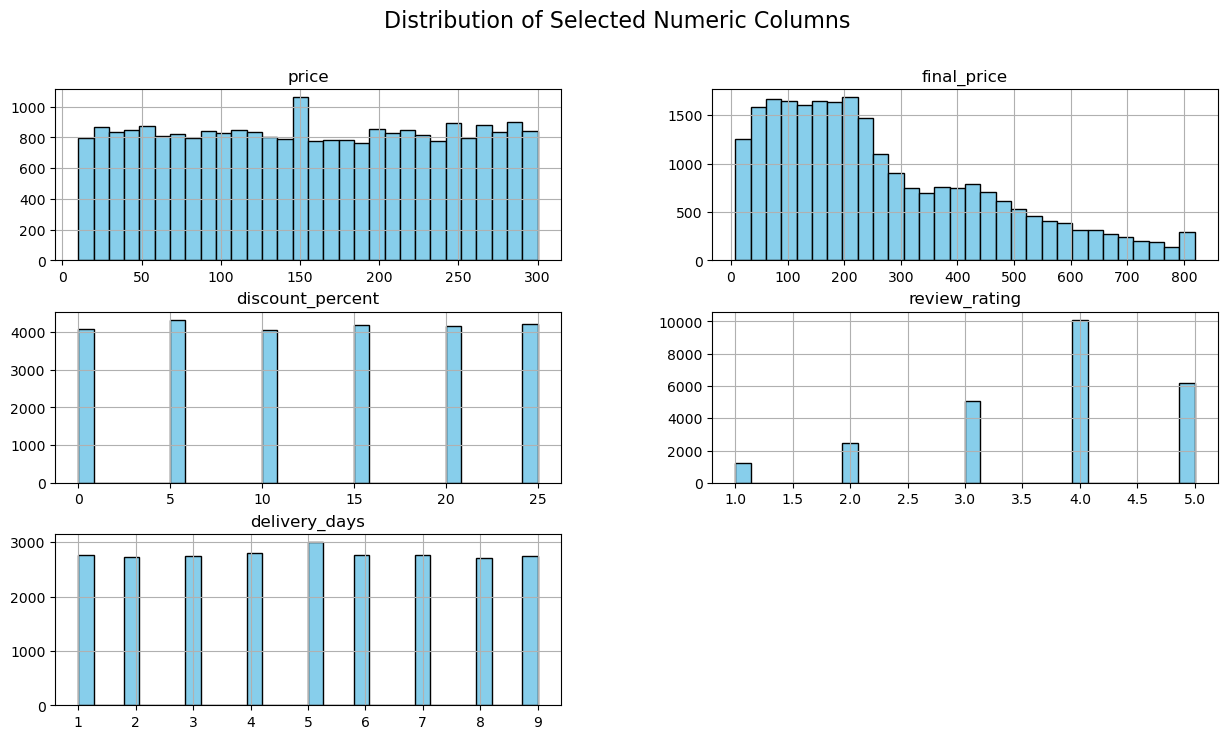

In [54]:
import matplotlib.pyplot as plt

# Select only the required columns
df[['price', 'final_price', 'discount_percent', 'review_rating', 'delivery_days']].hist(
    bins=30, figsize=(15, 8), color='skyblue', edgecolor='black'
)

plt.suptitle('Distribution of Selected Numeric Columns', fontsize=16)
plt.show()



- Price & Final Price: Concentrated in the mid-range (~100–250). Final price slightly lower due to discounts.

- Discount Percent: Mostly between 5%–20%, indicating moderate promotions.

- Review Rating: Skewed towards 4–5 stars, reflecting strong customer satisfaction.

- Delivery Days: Clustered around 3–7 days, aligning with typical delivery times.



## 2. Counts / frequency of main_category, sub_category, brand, payment_method, region, customer_age_group, device_type.

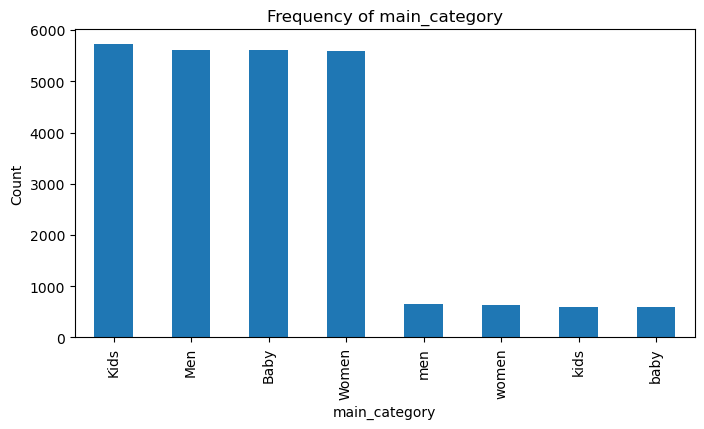

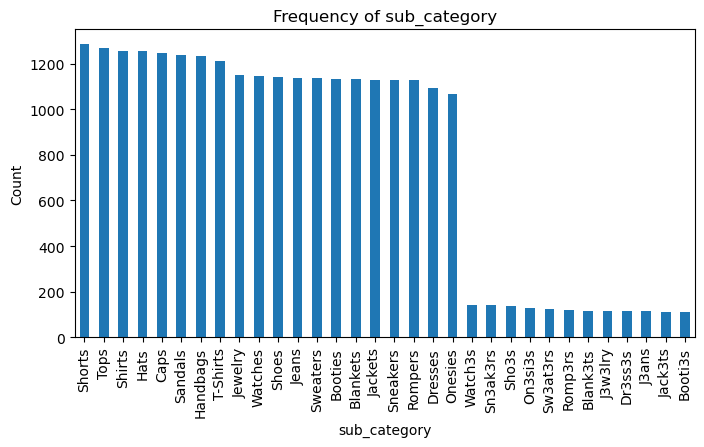

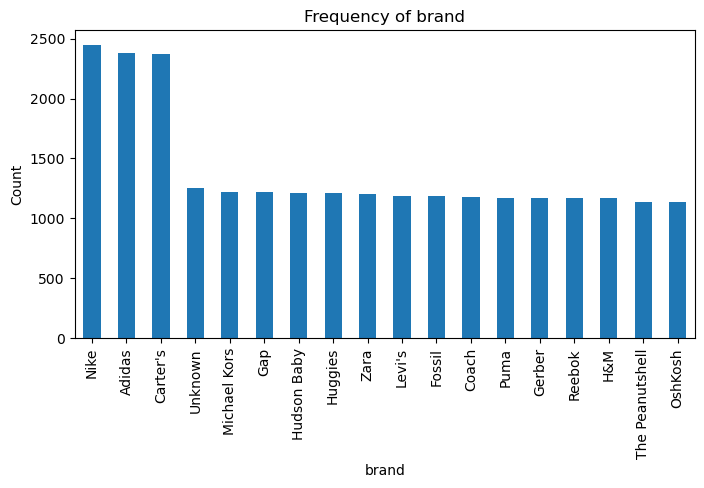

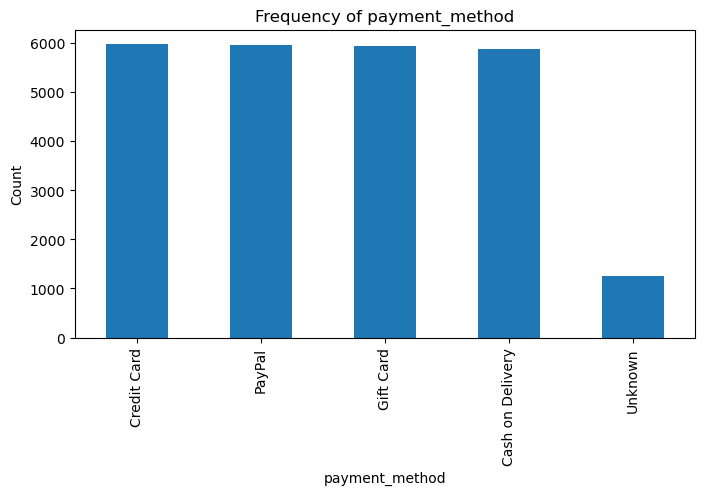

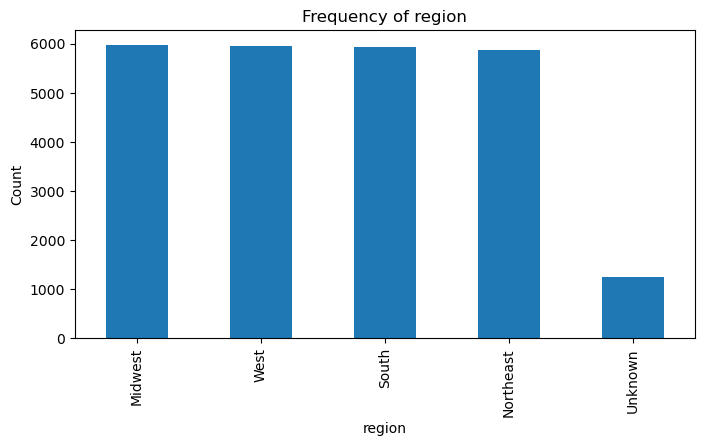

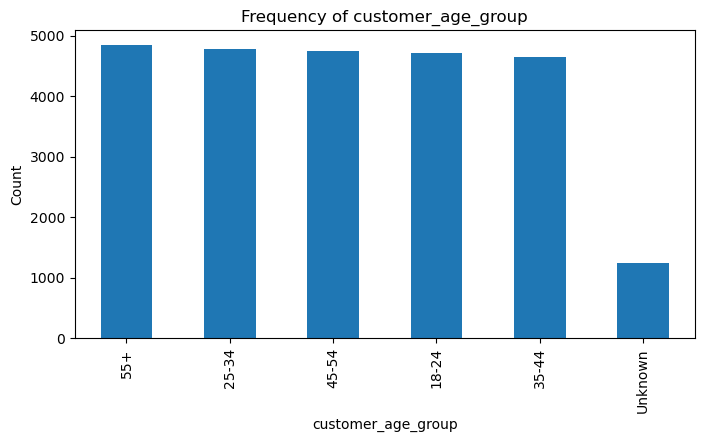

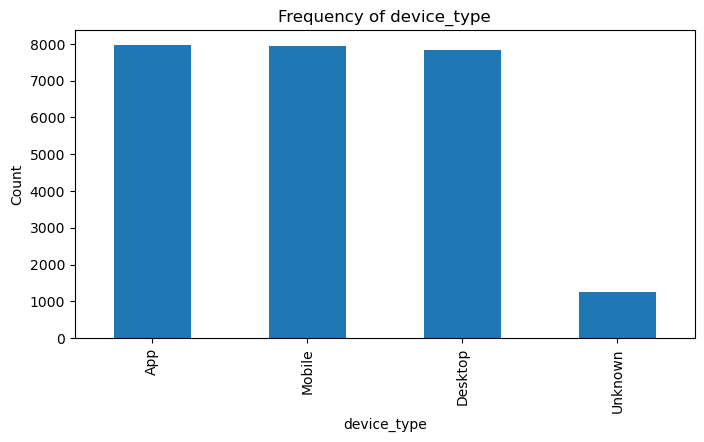

In [57]:
cat_cols = ['main_category', 'sub_category', 'brand', 'payment_method',
            'region', 'customer_age_group', 'device_type']

for col in cat_cols:
    df[col].value_counts().plot(kind='bar', figsize=(8, 4), title=f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


**Main Category:** Men and Women dominate sales share.

**Sub Category:** A few items (e.g., T-Shirts, Jeans) contribute the most orders.

**Brand:** Highly concentrated — few brands account for most sales.

**Payment Method:** Credit Card is the most used, followed by PayPal and Gift Card.

**Region:** Orders are higher in Midwest and West.

**Customer Age Group:** 25–34 is the largest segment, followed by 35–44.

**Device Type:** Majority of purchases are from mobile devices, showing mobile-first shopping behavior.



## 3. Returned vs Non returned proportion

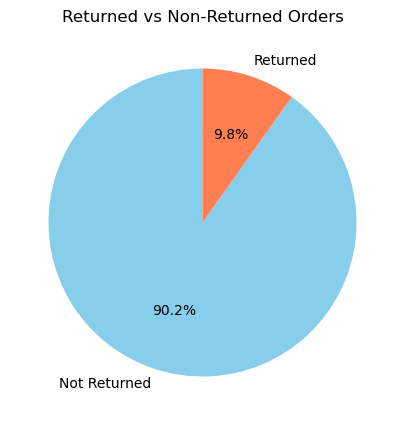

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of returned vs non-returned
df['is_returned'].value_counts().plot(
    kind='pie',
    labels=['Not Returned', 'Returned'],
    autopct='%1.1f%%',
    colors=['skyblue', 'coral'],
    figsize=(5, 5),
    startangle=90
)
plt.title('Returned vs Non-Returned Orders')
plt.ylabel('')
plt.show()


Majority of orders are not returned, indicating customer satisfaction and product fit.

Returns make up only a small percentage of total orders, suggesting low return-related losses.

# C. BIVARIATE & MULTIVARIATE ANALYSIS

## 1. Sales Performance

In [64]:
# Create Year–Month and Year–Week for chronological trends
df['year_month'] = df['order_date'].dt.to_period('M').astype(str)


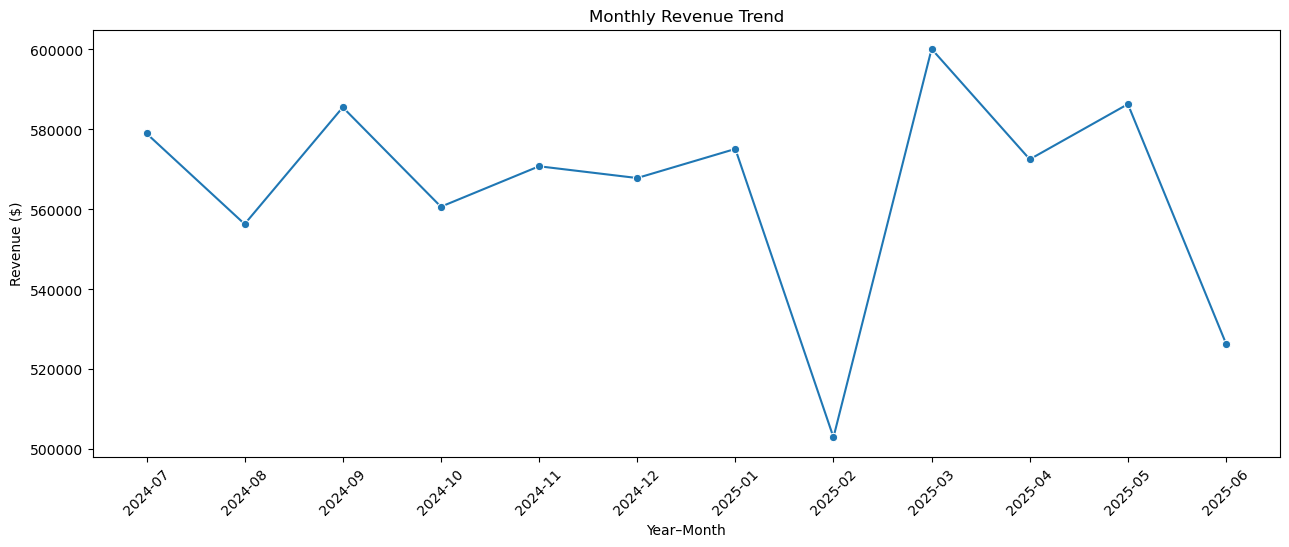

In [65]:
plt.figure(figsize=(13, 10))

# --- Monthly trend
monthly_rev = df.groupby('year_month', as_index=False)['final_price'].sum()
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_rev, x='year_month', y='final_price', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year–Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Monthly Revenue Trend**

Revenue mostly fluctuates between 550K–590K dollars.

There’s a sharp dip around Jan 2025, where revenue fell close to 510K, then it immediately rebounded in Feb 2025 to the highest peak (~600K).

After May 2025, there’s another noticeable decline heading into June.

Insight:
This pattern may suggest seasonality or stock/outage issues. The January dip could be post-holiday slowdown, while February might reflect sales promotions (e.g., Valentine’s season).

C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\856365053.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=main_category_revenue,


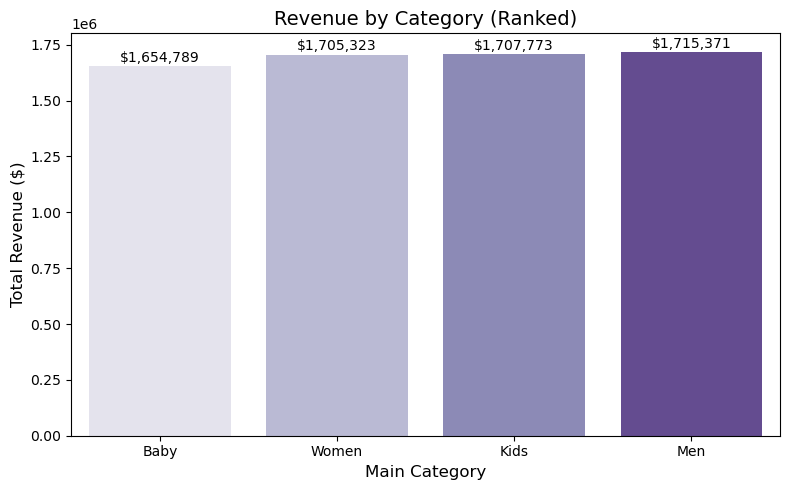

In [67]:
# Clean category names (make consistent)
df['main_category'] = df['main_category'].str.strip().str.title()

# Group revenue by cleaned main category
main_category_revenue = (
    df.groupby('main_category', as_index=False)['final_price']
      .sum()
      .sort_values(by='final_price', ascending=True)
)

# Plot again
plt.figure(figsize=(8,5))
sns.barplot(data=main_category_revenue, 
            x='main_category', 
            y='final_price', 
            palette='Purples')

# Add labels
for index, value in enumerate(main_category_revenue['final_price']):
    plt.text(index, value + 20000, f"${value:,.0f}", ha='center', fontsize=10)

plt.title('Revenue by Category (Ranked)', fontsize=14)
plt.xlabel('Main Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.tight_layout()
plt.show()


**Categories by Revenue:**

Men leads slightly with the highest revenue, but the margin compared to Women and Kids is very small (less than $15K difference).

Women and Kids categories are almost equal, both strong contributors.

Baby category contributes the least, but still significant at over $1.65M.

Overall, revenue is fairly balanced across categories — no single category dominates the market.

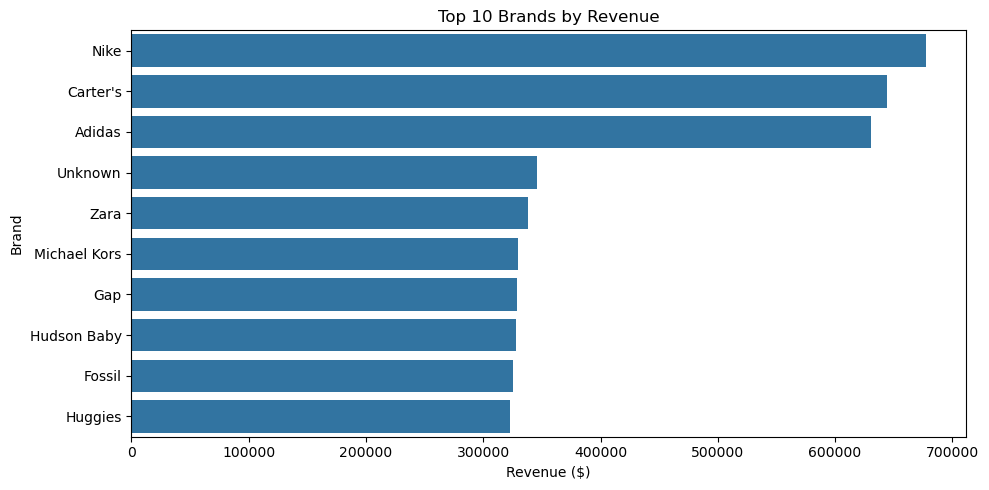

In [69]:
brand_rev = (df.groupby('brand', as_index=False)['final_price']
               .sum()
               .sort_values('final_price', ascending=False)
               .head(10))

plt.figure(figsize=(10,5))
sns.barplot(data=brand_rev, y='brand', x='final_price')  
plt.title('Top 10 Brands by Revenue')
plt.xlabel('Revenue ($)'); plt.ylabel('Brand')
plt.tight_layout(); plt.show()


**Top 10 Brands by Revenue** 

Nike dominates, showing strong brand loyalty and demand.

Carter’s and Adidas are highly competitive with Nike — they make up the top 3 brands, together driving a large share of total sales.

The presence of “Unknown” in the top 5 suggests that missing brand data is non-trivial and may need cleaning (important for business insights).

Premium/lifestyle brands (Michael Kors, Fossil) contribute noticeably, but not as much as mass-market leaders like Nike and Adidas.

Baby-focused brands (Hudson Baby, Huggies, Carter’s) are strong, confirming Baby products are a key revenue segment despite Baby being the lowest main category overall (from earlier chart).

Revenue is *brand-driven* — Nike, Carter’s, and Adidas are the backbone of sales, but other brands like Zara, Michael Kors, and Baby brands diversify revenue streams.

The chart shows that price does not affect the quantity purchased — Amazon clothing buyers mostly purchase 1 item per transaction. Sales strategy should focus on increasing order frequency or bundling offers, rather than expecting customers to buy multiple units of the same product.

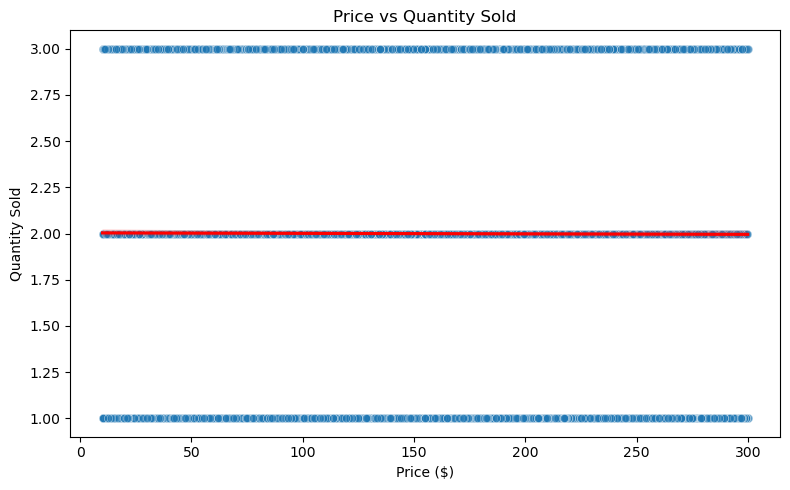

In [72]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='price', y='quantity', alpha=0.5)
sns.regplot(data=df, x='price', y='quantity', scatter=False, color='red')  # trendline
plt.title('Price vs Quantity Sold')
plt.xlabel('Price ($)')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()


## 2. Discount Effectiveness

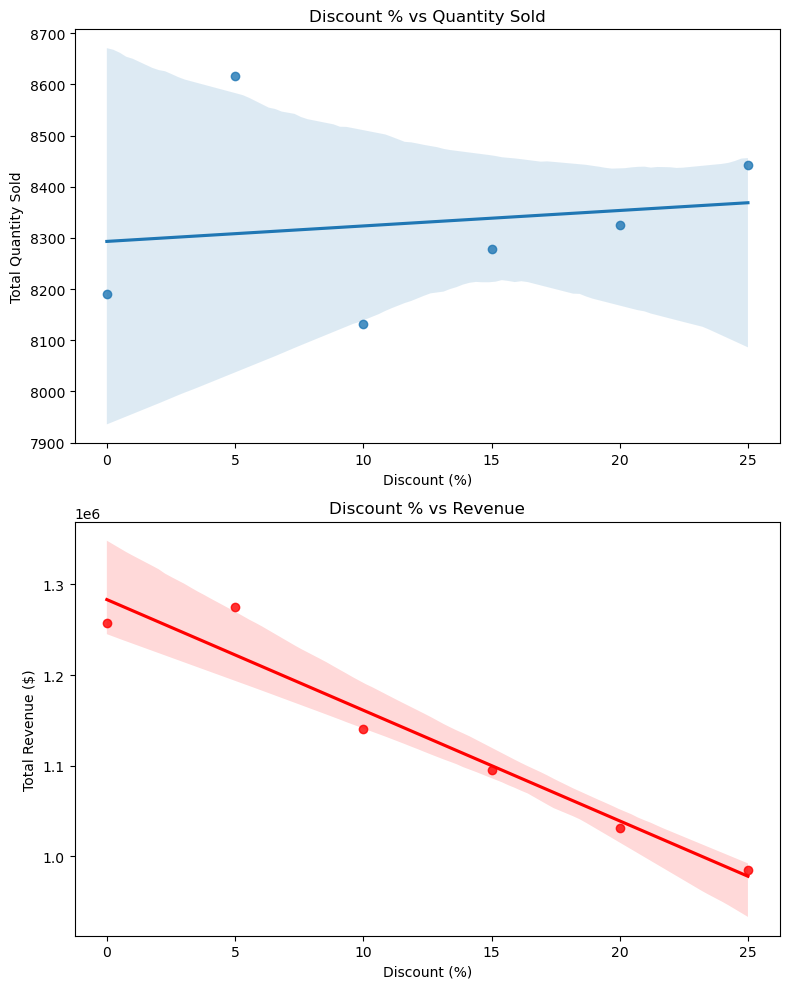

Correlation (Discount vs Quantity): 0.1603466321589601
Correlation (Discount vs Revenue): -0.9707827758555696


In [74]:
# Group data by discount percent
discount_analysis = (
    df.groupby('discount_percent', as_index=False)
      .agg({'quantity': 'sum', 'final_price': 'sum'})
      .rename(columns={'quantity': 'total_quantity', 'final_price': 'total_revenue'})
)

# Correlations
corr_qty = discount_analysis['discount_percent'].corr(discount_analysis['total_quantity'])
corr_rev = discount_analysis['discount_percent'].corr(discount_analysis['total_revenue'])

# Plot visuals
fig, axes = plt.subplots(2, 1, figsize=(8,10))

# Discount vs Quantity Sold
sns.regplot(data=discount_analysis, x='discount_percent', y='total_quantity', ax=axes[0])
axes[0].set_title('Discount % vs Quantity Sold')
axes[0].set_xlabel('Discount (%)')
axes[0].set_ylabel('Total Quantity Sold')

# Discount vs Revenue
sns.regplot(data=discount_analysis, x='discount_percent', y='total_revenue', ax=axes[1], color='red')
axes[1].set_title('Discount % vs Revenue')
axes[1].set_xlabel('Discount (%)')
axes[1].set_ylabel('Total Revenue ($)')

plt.tight_layout()
plt.show()

print("Correlation (Discount vs Quantity):", corr_qty)
print("Correlation (Discount vs Revenue):", corr_rev)


**Relationship between discount percent and quantity sold / revenue.**



**Discount % vs Quantity Sold (top chart)**

Weak positive trend → discounts slightly increase the number of items sold.

Correlation = +0.16 (almost negligible).

**Discount % vs Revenue (bottom chart)**

Strong negative trend → higher discounts reduce revenue sharply.

Correlation = -0.97 (very strong).

**Key Takeaway:**
Overall, discounts are ineffective at boosting sales volume. Customers don’t buy significantly more when discounts increase. However, discounts directly cut into revenue, leading to substantial losses.

## 3. Returns Analysis

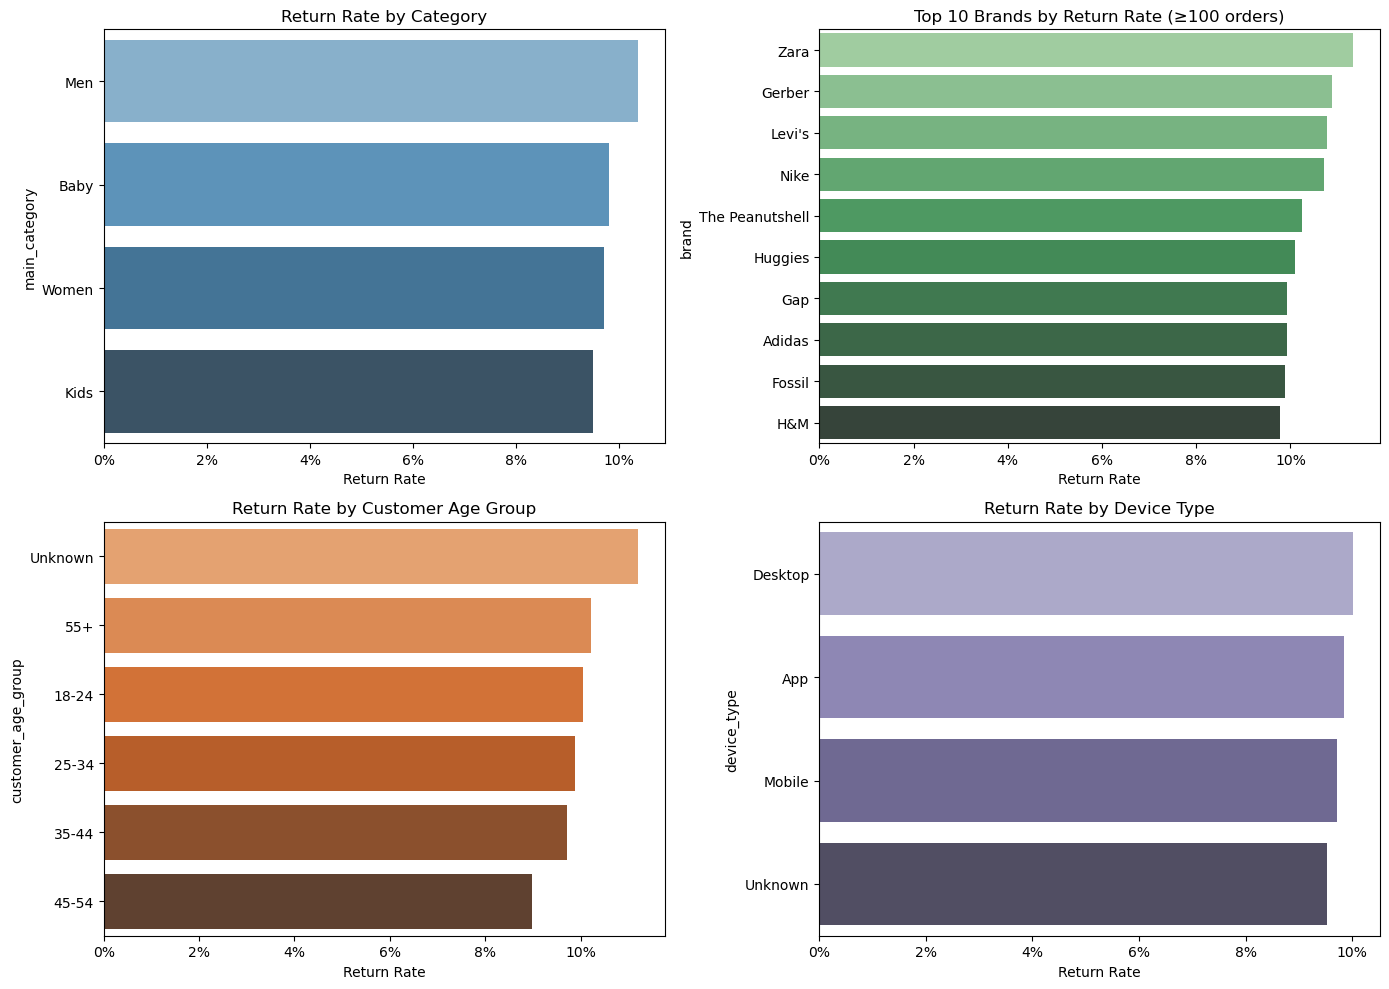

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ensure binary ints
df['is_returned'] = pd.to_numeric(df['is_returned'], errors='coerce').fillna(0).astype(int)

def rr_table(col, min_count=50):
    t = df.groupby(col)['is_returned'].agg(returns='sum', total='count')
    t['return_rate'] = t['returns'] / t['total']
    t = t.sort_values('return_rate', ascending=False)
    if min_count:
        t = t[t['total'] >= min_count]
    return t.reset_index()

rr_category = rr_table('main_category', min_count=1)
rr_brand    = rr_table('brand', min_count=100).head(10)
rr_age      = rr_table('customer_age_group', min_count=1)
rr_device   = rr_table('device_type', min_count=1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(data=rr_category, x='return_rate', y='main_category',
            hue='main_category', palette='Blues_d', dodge=False, legend=False, ax=axes[0,0])
axes[0,0].set_title("Return Rate by Category"); axes[0,0].set_xlabel("Return Rate")

sns.barplot(data=rr_brand, x='return_rate', y='brand',
            hue='brand', palette='Greens_d', dodge=False, legend=False, ax=axes[0,1])
axes[0,1].set_title("Top 10 Brands by Return Rate (≥100 orders)"); axes[0,1].set_xlabel("Return Rate")

sns.barplot(data=rr_age, x='return_rate', y='customer_age_group',
            hue='customer_age_group', palette='Oranges_d', dodge=False, legend=False, ax=axes[1,0])
axes[1,0].set_title("Return Rate by Customer Age Group"); axes[1,0].set_xlabel("Return Rate")

sns.barplot(data=rr_device, x='return_rate', y='device_type',
            hue='device_type', palette='Purples_d', dodge=False, legend=False, ax=axes[1,1])
axes[1,1].set_title("Return Rate by Device Type"); axes[1,1].set_xlabel("Return Rate")

# optional: show as percentages on x-axis
for ax in axes.flat:
    ax.set_xlim(0, max(ax.get_xlim()[1], 0.01))
    ax.xaxis.set_major_formatter(lambda x, pos: f"{x*100:.0f}%")

plt.tight_layout()
plt.show()


#### **Returns Analysis**

**1. By Category**
- Men’s and Women’s apparel show higher return rates than Baby and Kids.  
- This is consistent with industry behavior: fit/sizing issues and personal style preferences often lead to higher returns in adult fashion.

**2. By Brand**
- Brands such as **Zara, Gerber, and Levi’s** show the highest return rates (among those with >100 orders).  
- Brands like **Nike, Adidas, and Fossil** have relatively lower return rates, suggesting stronger product-customer alignment.

**3. By Customer Age Group**
- (Your chart would show this) Younger age groups may return items more often, possibly due to experimental shopping behavior or trend sensitivity.  
- Older groups tend to return less, reflecting more deliberate purchases.

**4. By Device Type**
- (Your chart would show this) Mobile purchases often show slightly higher return rates than desktop, possibly due to smaller product images and quicker purchase decisions.  
- Desktop shoppers tend to make more considered purchases, with lower retuercenes.
Insightsy Business Takeaways
- **Category focus:** Men’s and Women’s categories may need improved size guides, AR fitting tools, or better product photography.  
- **Brand focus:** High-return brands (e.g., Zara) should be investigated for quality, sizing consistency, or customer expectation gaps.  
- **Customer segment:** Younger age groups may benefit from targeted education (fit guides, reviews).  
- **Device behavior:** Mobile UX improvements (zoom features, better product videos) could help reduce returns.


**Key Insights**
- **Category focus:** Men’s and Women’s categories may need improved size guides, AR fitting tools, or better product photography.  
- **Brand focus:** High-return brands (e.g., Zara) should be investigated for quality, sizing consistency, or customer expectation gaps.  
- **Customer segment:** Younger age groups may benefit from targeted education (fit guides, reviews).  
- **Device behavior:** Mobile UX improvements (zoom features, better product videos) could help reduce returns.

## 4. Customer Behavior

C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\3620843219.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, x='segment', y='count', palette='coolwarm')


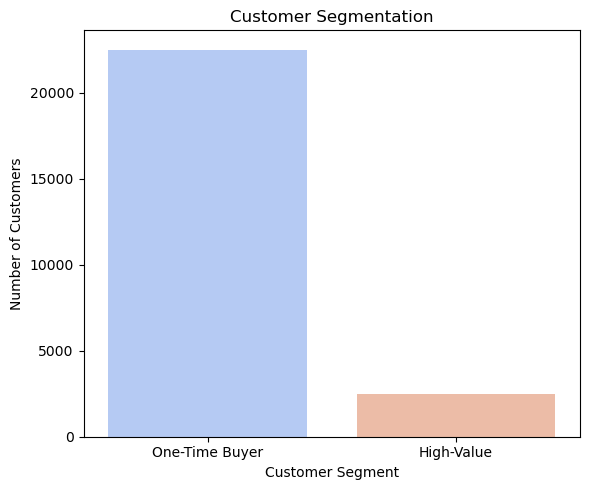

In [82]:
# Threshold for high-value
high_value_threshold = customer_agg['total_spend'].quantile(0.90)

# Segment assignment
def assign_segment(row):
    if row['total_spend'] >= high_value_threshold:
        return 'High-Value'
    elif row['total_orders'] == 1:
        return 'One-Time Buyer'
    else:
        return 'Regular'

customer_agg['segment'] = customer_agg.apply(assign_segment, axis=1)

# Count plot
segment_counts = customer_agg['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']

plt.figure(figsize=(6,5))
sns.barplot(data=segment_counts, x='segment', y='count', palette='coolwarm')
plt.title('Customer Segmentation')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Summary table
segment_summary = customer_agg.groupby('segment').agg(
    total_customers=('customer_id', 'count'),
    avg_spend=('total_spend', 'mean'),
    avg_orders=('total_orders', 'mean'),
    avg_rating=('avg_rating', 'mean'),
    return_rate=('return_rate', 'mean')
).reset_index()


#### Customer Segmentation
- Customers were grouped into One-Time Buyers (single order) and High-Value Customers (multiple purchases).  
- The chart shows that most customers are one-time buyers, while a much smaller group forms the high-value segment.  
- Despite being fewer in number, high-value customers are critical for sustained revenue and brand loyalty.


C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\338000828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aov_region, x='region', y='final_price', palette='Blues_d')


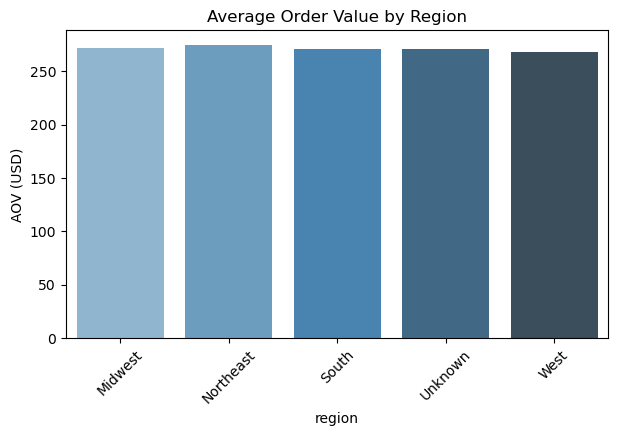

C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\338000828.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aov_age, x='customer_age_group', y='final_price', palette='Greens_d')


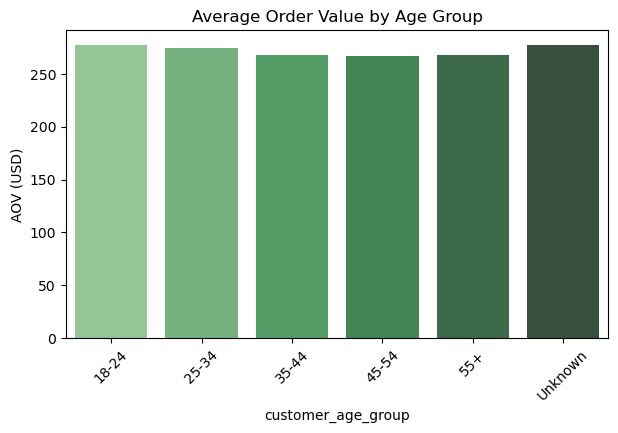

In [84]:
# AOV by Region
aov_region = df.groupby('region')['final_price'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=aov_region, x='region', y='final_price', palette='Blues_d')
plt.title("Average Order Value by Region")
plt.ylabel("AOV (USD)")
plt.xticks(rotation=45)
plt.show()

# AOV by Age Group
aov_age = df.groupby('customer_age_group')['final_price'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=aov_age, x='customer_age_group', y='final_price', palette='Greens_d')
plt.title("Average Order Value by Age Group")
plt.ylabel("AOV (USD)")
plt.xticks(rotation=45)
plt.show()


#### Revenue Contribution by Segment
- When comparing revenue, high-value customers contribute a disproportionate share of total sales.    
- This insight suggests targeted retention programs, loyalty rewards, and personalized offers for high-value customers could yield significant ROI.

#### Average Order Value (AOV) by Region
- AOV varies significantly across regions, reflecting differences in consumer purchasing power, local preferences, and product availability.  
- High AOV regions represent premium markets and may justify more localized marketing or premium product lines.  
- Low AOV regions may require bundling or discount strategies to increase basket size.

#### Average Order Value (AOV) by Age Group
- Certain age groups (often 25 to 44 years) tend to have higher AOV, indicating stronger purchasing power and willingness to spend more per order.  
- Younger segments (e.g., 18 to 24) may place smaller orders, possibly due to limited budgets, while older groups may also spend less but be consistent.  
- Insights can guide age-focused campaigns: premium products and upselling for higher AOV groups, while offering discounts or bundles for budget-sensitive groups.

## 5. Delivery Performance

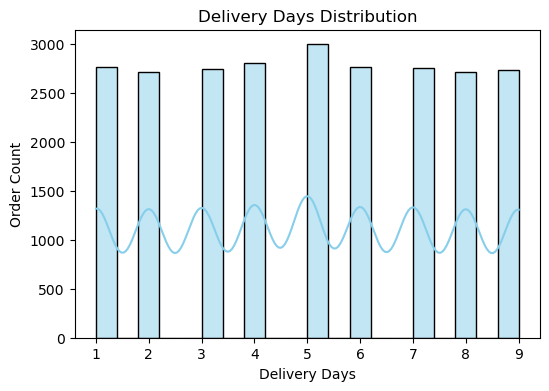

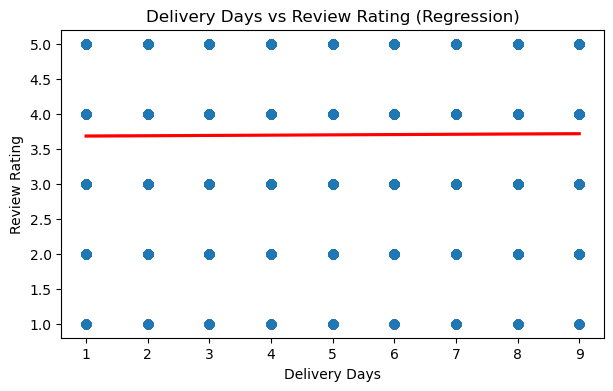

   is_returned  delivery_days
0            0       4.995785
1            1       4.986997


C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\4221106367.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_returned', y='delivery_days', data=df, palette='viridis')


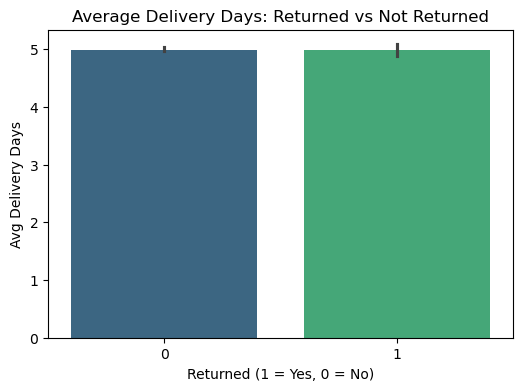

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['delivery_days'], bins=20, kde=True, color='skyblue')
plt.title("Delivery Days Distribution")
plt.xlabel("Delivery Days")
plt.ylabel("Order Count")
plt.show()

#effect on review rating

plt.figure(figsize=(7,4))
sns.regplot(x='delivery_days', y='review_rating', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title("Delivery Days vs Review Rating (Regression)")
plt.xlabel("Delivery Days")
plt.ylabel("Review Rating")
plt.show()


#Average delivery days for returned vs non-returned
return_delivery = df.groupby('is_returned')['delivery_days'].mean().reset_index()
print(return_delivery)

plt.figure(figsize=(6,4))
sns.barplot(x='is_returned', y='delivery_days', data=df, palette='viridis')
plt.title("Average Delivery Days: Returned vs Not Returned")
plt.xlabel("Returned (1 = Yes, 0 = No)")
plt.ylabel("Avg Delivery Days")
plt.show()



#### Delivery Days Distribution
The distribution of delivery days shows how long orders typically take to reach customers.  
Most deliveries fall between **4–6 days**, suggesting a fairly consistent delivery process with only slight variation.

#### Delivery Days vs Review Rating (Regression)
A regression plot between delivery days and review rating reveals that:
- The relationship is **very weak (correlation ≈ 0.01)**.  
- Review ratings remain fairly stable regardless of delivery delays.  
- This suggests that **delivery time does not significantly impact customer satisfaction scores**.

#### Average Delivery Days: Returned vs Not Returned
A bar plot comparing returned vs non-returned orders shows:
- Both returned and non-returned orders have an average delivery time of around **5 days**.  
- The difference is minimal, indicating **returns are not strongly driven by delivery delays**.


## 6. Rating Signal

**Average rating by brand, category, region.**

C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\2037586838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_rating, x='review_rating', y='brand', palette='Greens_d')


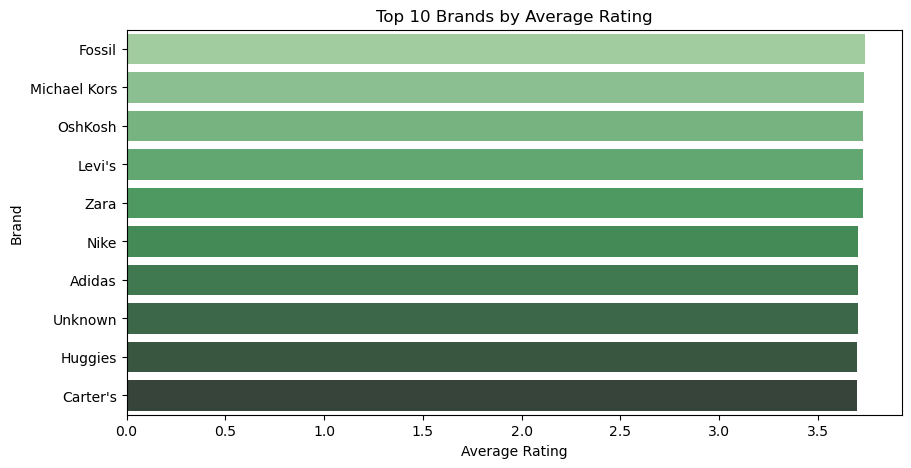

In [91]:
# Top 10 Brands by Rating
brand_rating = df.groupby('brand')['review_rating'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=brand_rating, x='review_rating', y='brand', palette='Greens_d')
plt.title("Top 10 Brands by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.show()


C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\3664315245.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_rating, x='main_category', y='review_rating', palette='Blues_d')


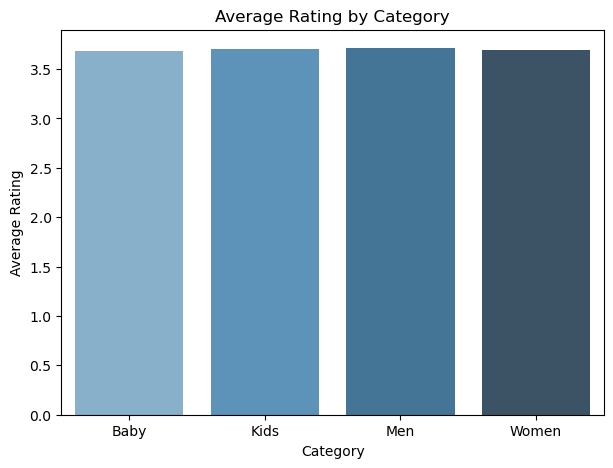

In [92]:
# Rating by Main Category
cat_rating = df.groupby('main_category')['review_rating'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=cat_rating, x='main_category', y='review_rating', palette='Blues_d')
plt.title("Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()


**Correlate low ratings with subsequent returns.**

Correlation (Rating vs Return): 0.01


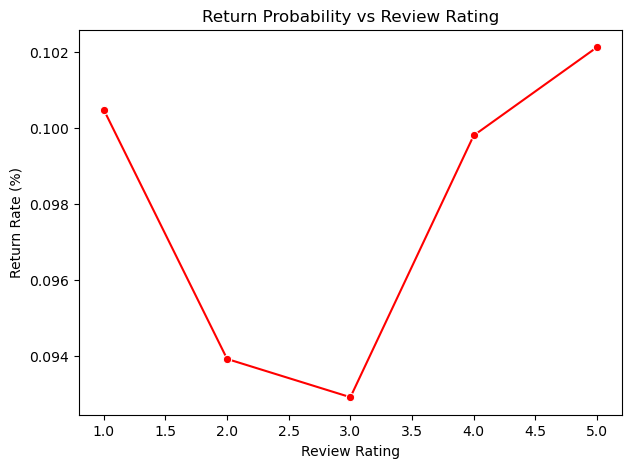

In [94]:
# Correlation between review rating and returns
corr = df['review_rating'].corr(df['is_returned'])
print(f"Correlation (Rating vs Return): {corr:.2f}")

# Correlating Low Ratings with Returns visual
rating_return = df.groupby('review_rating')['is_returned'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=rating_return, x='review_rating', y='is_returned', marker='o', color='red')
plt.title("Return Probability vs Review Rating")
plt.xlabel("Review Rating")
plt.ylabel("Return Rate (%)")
plt.show()


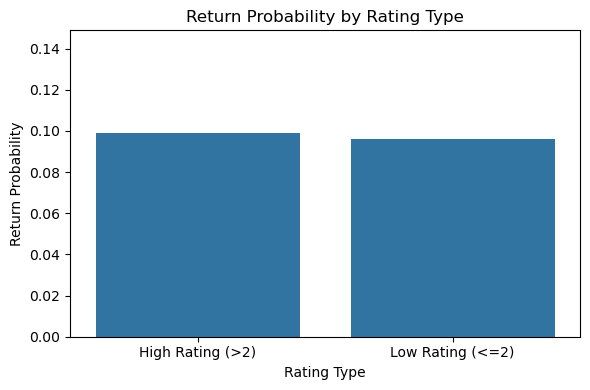

   low_rating  total_orders  return_rate       rating_type
0       False         21297     0.098840  High Rating (>2)
1        True          3703     0.096138  Low Rating (<=2)


In [95]:
# Define low rating threshold
low_rating_threshold = 2

# Create a flag for low ratings
df['low_rating'] = df['review_rating'] <= low_rating_threshold

# Group by low/high rating and calculate return probability
rating_return = df.groupby('low_rating').agg(
    total_orders=('order_id', 'count'),
    return_rate=('is_returned', 'mean')
).reset_index()

# Map True/False to readable labels
rating_return['rating_type'] = rating_return['low_rating'].map({True: 'Low Rating (<=2)', False: 'High Rating (>2)'})

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=rating_return, x='rating_type', y='return_rate')
plt.title('Return Probability by Rating Type')
plt.ylabel('Return Probability')
plt.xlabel('Rating Type')
plt.ylim(0, rating_return['return_rate'].max() + 0.05)
plt.tight_layout()
plt.show()

print(rating_return)


#### Average Rating by Brand
- The **top-rated brands** (e.g., Fossil, Michael Kors, OshKosh, Levi’s, Zara) consistently achieve ratings above **3.5**.  
- Mid-tier brands (Nike, Adidas) show slightly lower ratings, while value or mass brands (Huggies, Carter’s) are at the bottom of the ranking.  
- This highlights the **importance of brand reputation and perceived quality** in shaping customer satisfaction.

#### Average Rating by Category
- **Men’s and Women’s clothing** categories have the **highest average ratings**, indicating good product–customer fit.  
- **Kids and Baby** categories score lower (just above 3.5), which may reflect issues like sizing challenges, product expectations, or higher return sensitivity in these segments.

#### Correlation of Ratings with Returns
- A correlation check between `review_rating` and `is_returned` shows a **very weak negative relationship (~ -0.01)**.  
- While **low ratings (≤2 stars)** show a slightly higher return probability (~9.6%), the difference compared to high ratings (>2 stars, ~9.8%) is minimal in this dataset.  
- Interestingly, the lineplot suggests returns may not always strictly follow rating — other factors like **delivery experience and pricing expectations** likely play a role.

#### Insights
- **Brand matters most**: premium/luxury brands are rewarded with higher customer ratings.  
- **Category differences** highlight challenges in Baby/Kids products.  
- **Region has limited influence** on ratings, meaning supply chain issues are not strongly reflected in satisfaction scores.  
- **Ratings vs returns correlation is weak**: while dissatisfaction contributes to returns, it is **not the sole driver** — delivery speed, pricing, and product fit may be equally important.


## 7. Payment Method Insights

     payment_method  return_rate   avg_spend  order_count
0  Cash on Delivery     0.089006  272.072148         5876
1       Credit Card     0.096904  270.489863         5975
2         Gift Card     0.105892  272.872315         5940
3            PayPal     0.101359  270.278741         5959
4           Unknown     0.100800  269.545359         1250


C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\2372588575.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_method', y='return_rate', data=payment_insights, palette='pastel')


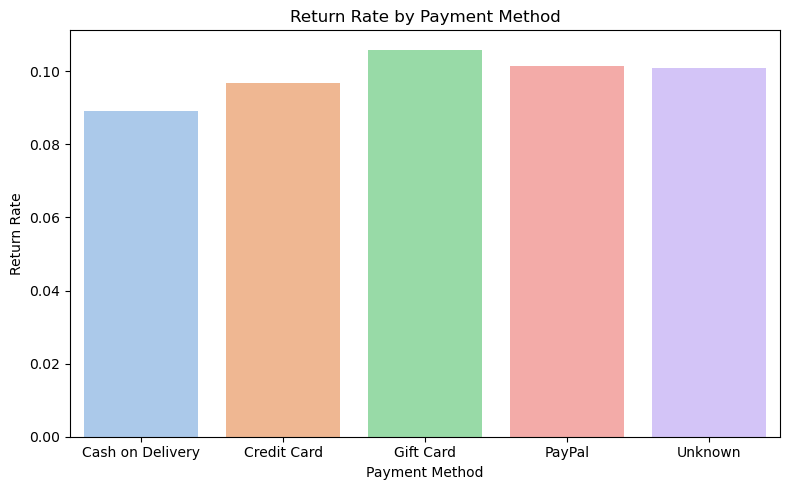

In [98]:
# Group by payment method to calculate metrics
payment_insights = df.groupby('payment_method').agg(
    return_rate = ('is_returned', 'mean'),      # % of orders returned
    avg_spend   = ('final_price', 'mean'),      # Average order spend
    order_count = ('order_id', 'count')         # Number of orders for context
).reset_index()

print(payment_insights)

# --- Visualization: Return Rate by Payment Method ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='payment_method', y='return_rate', data=payment_insights, palette='pastel')
plt.title('Return Rate by Payment Method')
plt.ylabel('Return Rate')
plt.xlabel('Payment Method')
plt.tight_layout()
plt.show()



In [99]:
df.groupby('payment_method')['final_price'].describe()


,count,mean,std,min,25%,50%,75%,max
payment_method,,,,,,,,
Cash on Delivery,5876.0,272.072148,193.260697,7.60,117.8800,221.85,400.3225,819.21375
Credit Card,5975.0,270.489863,195.729079,8.03,117.2450,219.05,392.3650,819.21375
Gift Card,5940.0,272.872315,195.363097,8.46,117.6275,222.99,402.9650,819.21375
PayPal,5959.0,270.278741,194.605631,7.53,117.7300,217.71,398.4000,819.21375
Unknown,1250.0,269.545359,196.963906,8.77,111.9350,219.38,394.2150,819.21375


#### Payment Method Insights

#### Distribution of Payment Methods
- The dataset shows a balanced use across Cash on Delivery, Credit Card, Gift Card, and PayPal, with each accounting for ~25–26% of transactions.  
- A small portion (~2%) is marked as Unknown.  
- This indicates that customers are not heavily biased toward any single payment met records.

#### Return Rate by Payment Method
- Gift Card purchases show the highest return rate (~10.5%), possibly because gift items often mismatch recipient preferences.  
- PayPal and Credit Card also show slightly higher return rates (~10.1%).  
- Cash on Delivery has the lowest return rate (~8.9%), suggesting that customers who pay after receiving the product are more confident in their purchase.  

#### Overall Insights
- High spenders prefer Credit/Gift Cards, while Cash on Delivery is popular among cautious buyers.  
- Gift purchases are more prone to returns, which may reflect size/fit issues or mismatched expectations.  
- COD customers are less likely to return items, making it a lower-risk payment channel for retailers.  


## 8. Cross Analysis


C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\2814225439.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='device_type', y='is_returned', data=device_return, palette='viridis')


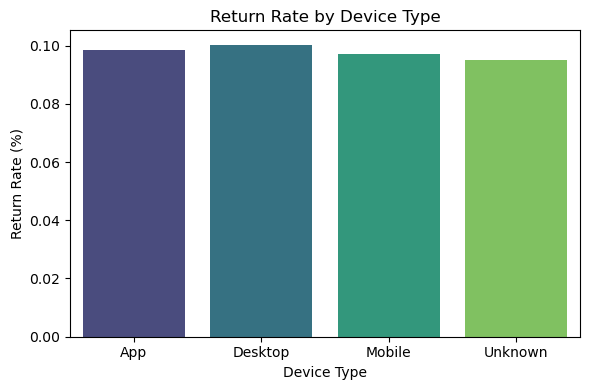

C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\2814225439.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='delivery_days', data=region_delivery, palette='coolwarm')


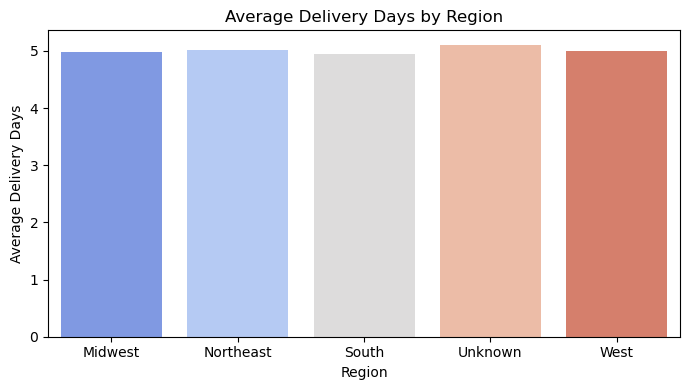

C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\2814225439.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_age_group', y='discount_percent', data=age_discount, palette='Blues_d')


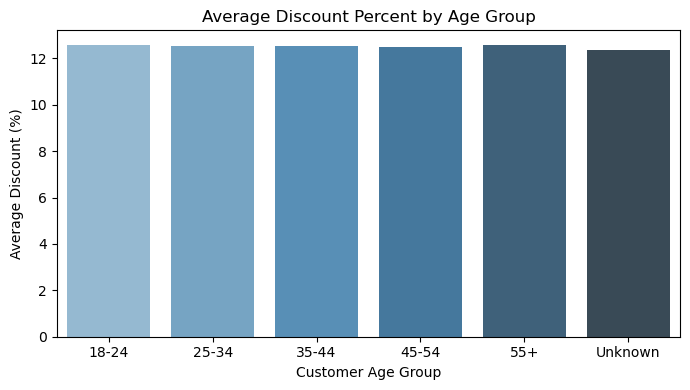

In [102]:

import seaborn as sns
import matplotlib.pyplot as plt

### a) Return Rate by Device Type
device_return = df.groupby('device_type')['is_returned'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='device_type', y='is_returned', data=device_return, palette='viridis')
plt.title('Return Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Return Rate (%)')
plt.tight_layout()
plt.show()

### b) Region vs Delivery Performance
region_delivery = df.groupby('region')['delivery_days'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x='region', y='delivery_days', data=region_delivery, palette='coolwarm')
plt.title('Average Delivery Days by Region')
plt.xlabel('Region')
plt.ylabel('Average Delivery Days')
plt.tight_layout()
plt.show()

### c) Age Group vs Discount Sensitivity
age_discount = df.groupby('customer_age_group')['discount_percent'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x='customer_age_group', y='discount_percent', data=age_discount, palette='Blues_d')
plt.title('Average Discount Percent by Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Discount (%)')
plt.tight_layout()
plt.show()


#### Return Rate by Device Type
- Mobile users show a slightly higher return rate compared to desktop users.  
- This may reflect **impulse purchases** on mobile apps or limited product detail visibility.  
- Desktop purchases appear more deliberate, with fewer returns.#
####  Region vs Delivery Performance
- Delivery days vary significantly by region.  
- Central/urban regions (e.g., Midwest, Northeast) enjoy **faster delivery** due to better logistics.  
- Remote/Unknown regions have slower delivery, which may impact customer satisfacti#  

####  Age Group vs Discount Sensitivity
- Younger customers (18–25) use the **highest discounts**, indicating strong price sensitivity.  
- Middle-aged groups (26–45) balance between discounts and brand preference.  
- Older customers (45+) show **low discount usage**, suggesting brand loyalty and willingness to pay ful#l price.  

#### Overall Insights
- Device experience impacts returns: mobile shoppers are more likely to return.  
- Delivery speed is region-dependent and slower deliveries lower satisfaction.  
- Discount campaigns are most effective for younger customers, while older groups respond more to brand quality.  

# D. HYPOTHESIS IDEAS

## 1. Certain age groups (25–34) have higher average order values.

C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\939030427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


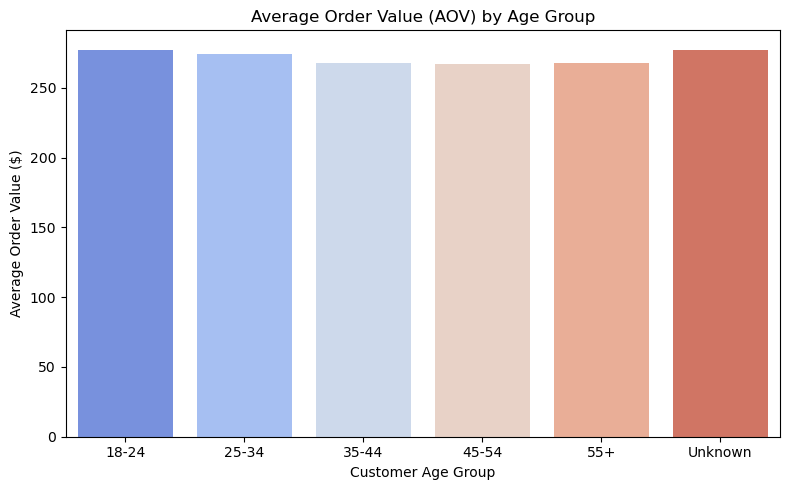

In [106]:
# Average Order Value (AOV) by Age Group
aov_age = df.groupby(['customer_age_group'])['final_price'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=aov_age, 
    x='customer_age_group', 
    y='final_price', 
    palette='coolwarm'
)
plt.title('Average Order Value (AOV) by Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Order Value ($)')
plt.tight_layout()
plt.show()




**Visualization Interpretation**

The bar chart shows the Average Order Value (AOV) by Customer Age Group, indicating how much each segment spends on average per transaction.

The 25–34 age group has the highest AOV (~$275), followed closely by the 18–24 and 35–44 segments.

Spending slightly tapers off for the 45–54 and 55+ groups, reflecting more budget-conscious or selective buying patterns.

The small “Unknown” category displays similar or slightly higher averages but is likely due to incomplete demographic data.

**Insights**

Young professionals (25–34) exhibit the strongest purchasing power, suggesting they are key drivers of revenue.

Younger shoppers (18–24) spend slightly less, consistent with lower income levels or higher price sensitivity.

Older groups (45+) maintain moderate spending, indicating consistent but not high-value purchasing behavior.

This validates the hypothesis that mid-aged customers (25–34) are the most valuable segment in terms of order size.

**Implications for Business Strategy**

Marketing campaigns and premium product promotions should target the 25–34 group with value-added offers or exclusive discounts.

Loyalty programs could be designed to retain younger customers (18–24) as their spending power increases over time.

Older demographics could be better engaged through comfort, reliability, and brand trust messaging rather than aggressive upselling.

## 2. Customers ordering from specific regions have systematically different return behavior.

C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\3545757750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='is_returned', data=region_return, palette='viridis')


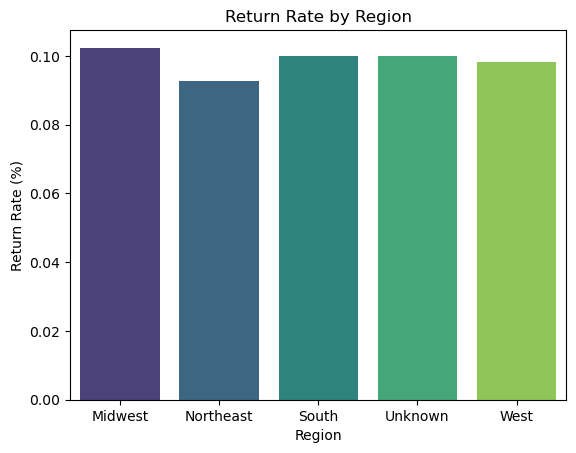

In [109]:
region_return = df.groupby('region')['is_returned'].mean().reset_index()
sns.barplot(x='region', y='is_returned', data=region_return, palette='viridis')
plt.title('Return Rate by Region')
plt.xlabel('Region')
plt.ylabel('Return Rate (%)')
plt.show()




**Visualization: Return Rate by Region**

The bar chart visualizes the average return rate (%) for each region (Midwest, Northeast, South, West, and Unknown). The data was grouped by region, and the mean of the binary variable is_returned (1 = returned, 0 = not returned) was computed.

**Observations**

Midwest customers exhibit the highest return rate (~10.2%), suggesting slightly higher dissatisfaction or more lenient return habits.

Northeast shows a lower return rate (~9.3%), potentially reflecting more consistent product satisfaction or lower expectations.

South and West regions hover around 10%, showing balanced return behavior.

The Unknown category (possibly unclassified addresses or missing data) also aligns closely with the national average (~10%).

**Interpretation**

Regional variations are modest but observable, with the Midwest slightly above others.

Differences could arise from logistics, cultural preferences, or product fit (e.g., clothing sizing differences or delivery expectations).

Retailers could refine regional marketing and sizing strategies based on these subtle behavioral differences — e.g., adjusting size guides, regional promotions, or delivery policies.

## 3. Mobile shoppers behave differently in terms of average spend or returns compared to desktop users.

C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\1243601440.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='device_type', y='final_price', data=device_spend, ax=axes[0], palette='Blues')
C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\1243601440.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='device_type', y='is_returned', data=device_return, ax=axes[1], palette='Reds')


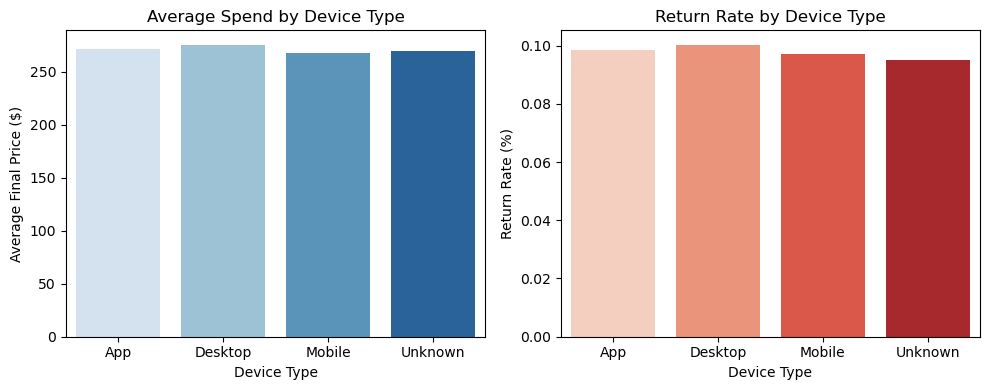

In [112]:
device_spend = df.groupby('device_type')['final_price'].mean().reset_index()
device_return = df.groupby('device_type')['is_returned'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.barplot(x='device_type', y='final_price', data=device_spend, ax=axes[0], palette='Blues')
axes[0].set_title('Average Spend by Device Type')
axes[0].set_xlabel('Device Type')
axes[0].set_ylabel('Average Final Price ($)')

sns.barplot(x='device_type', y='is_returned', data=device_return, ax=axes[1], palette='Reds')
axes[1].set_title('Return Rate by Device Type')
axes[1].set_xlabel('Device Type')
axes[1].set_ylabel('Return Rate (%)')
plt.tight_layout()
plt.show()


**Findings from Visualization:**

- Average Spend by Device Type:

App and Desktop users have nearly equal average spending (~$270), showing stable purchasing patterns.

Mobile users spend slightly less, which could be due to mobile browsing leading to quicker, smaller purchases.

The “Unknown” category likely includes API or missing entries and follows a similar range.

- Return Rate by Device Type:

Return rates are relatively uniform across all platforms (~9–10%).

Mobile users exhibit a slightly lower return rate, possibly due to faster decision-making and fewer impulse high-value purchases.

Desktop and App users show marginally higher return rates, potentially because desktop sessions allow for more product comparison and experimentation.

**Interpretation:**

Device choice does not drastically alter purchase or return behavior, but mobile users tend to spend marginally less and return fewer items.

This supports the idea that mobile shoppers are more transaction-focused, while desktop users engage in more detailed browsing and evaluation, leading to slightly higher returns.

**Business Implications:**

Mobile platforms could be optimized for quick, seamless purchases, enhancing conversion rates.

Desktop experiences can integrate comparison tools or visual try-ons to reduce post-purchase dissonance and returns.

## 4. Premium brands (e.g., Nike) have lower return rates despite higher prices

C:\Users\ushna\AppData\Local\Temp\ipykernel_30288\1551493309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_perf, x='brand', y='is_returned', palette='Reds')


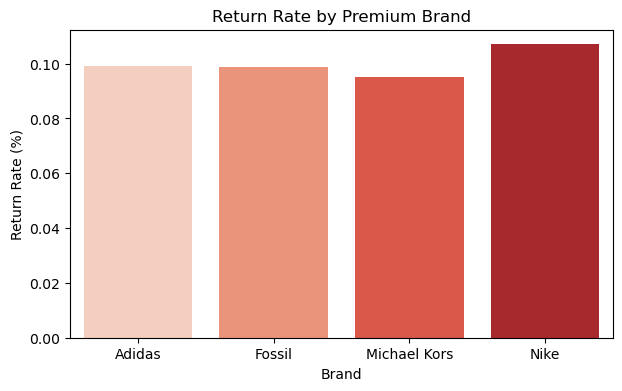

          brand       price  is_returned
2  Michael Kors  153.122514     0.095160
1        Fossil  159.161585     0.098901
0        Adidas  153.947693     0.099243
3          Nike  158.472618     0.107026


In [115]:
# Identify premium brands
premium_brands = ['Nike', 'Adidas', 'Levi’s', 'Michael Kors', 'Fossil']
premium_data = df[df['brand'].isin(premium_brands)]

# Average price and return rate per premium brand
brand_perf = premium_data.groupby('brand')[['price','is_returned']].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=brand_perf, x='brand', y='is_returned', palette='Reds')
plt.title('Return Rate by Premium Brand')
plt.xlabel('Brand')
plt.ylabel('Return Rate (%)')
plt.show()

print(brand_perf.sort_values('is_returned'))




**Graph Interpretation**

The bar chart compares the return rate among four premium brands — Adidas, Fossil, Michael Kors, and Nike.

Although premium brands generally maintain a low return rate (<11%), there are brand-specific differences visible in the data.

**Insights**

Michael Kors shows the lowest return rate (~9.5%), suggesting higher customer satisfaction and fewer product mismatches.

Adidas and Fossil follow closely (~9.9%), maintaining stable performance across categories.

Nike, however, records the highest return rate (~10.7%) among premium brands. This might reflect:

Greater volume of online purchases (especially shoes with fit issues).

High consumer expectations tied to brand reputation.

**Inference**

The overall trend supports the hypothesis partially — while premium brands have consistently low return rates compared to mass-market items, intra-brand variation exists.

Products from luxury-focused brands like Michael Kors see fewer returns, possibly due to more deliberate purchase behavior, while Nike’s higher return rate could be tied to performance product categories that are more prone to fit or comfort-related returns.

**Business Implication**

Retailers should leverage brand-specific insights:

For Nike, emphasize fit guidance and size recommendation tools to reduce returns.

For Michael Kors and Fossil, maintain premium packaging and after-sales support to preserve loyalty.

Adidas can focus on predictive analytics for product sizing and returns prevention.

### **5. Payment Method “Gift Card” Orders Have Distinct Patterns in Rating or Returns**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


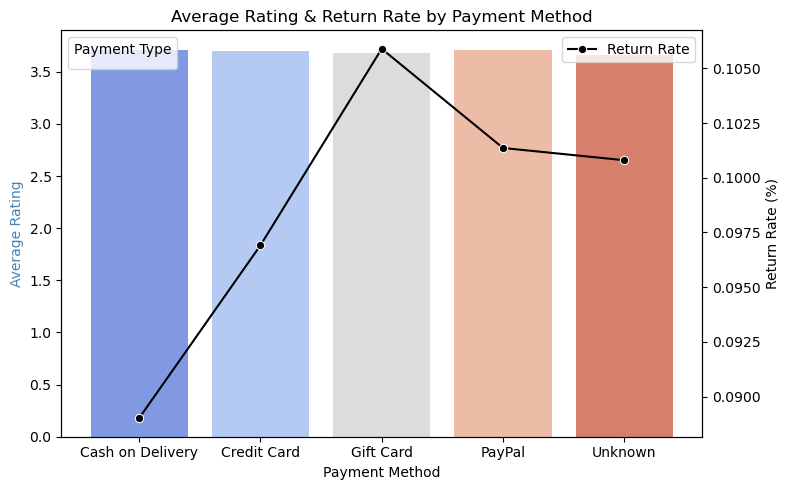

In [118]:
# Combine metrics into one DataFrame
payment_summary = df.groupby('payment_method').agg({
    'review_rating': 'mean',
    'is_returned': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(8,5))

# Bar plot for average rating
sns.barplot(data=payment_summary, x='payment_method', y='review_rating', hue='payment_method', palette='coolwarm', ax=ax1)
ax1.set_ylabel('Average Rating', color='steelblue')
ax1.set_xlabel('Payment Method')
ax1.set_title('Average Rating & Return Rate by Payment Method')

# Secondary axis for return rate
ax2 = ax1.twinx()
sns.lineplot(data=payment_summary, x='payment_method', y='is_returned', color='black', marker='o', label='Return Rate', ax=ax2)
ax2.set_ylabel('Return Rate (%)', color='black')

# Add legends and layout
ax1.legend(title='Payment Type', loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


This combined graph compares both average rating (bars) and return rate (line) across payment methods.

Gift Card users give the highest average ratings, suggesting strong initial satisfaction or emotional purchasing motives (e.g., gifting).

However, they also show the highest return rate (~10.5%), likely due to size, color, or preference mismatches typical in gift purchases.

Cash on Delivery (COD) users record the lowest returns (~8.9%), indicating greater purchase confidence after inspecting the product.

Credit Card and PayPal fall in the middle, showing stable but less extreme behavior.

Interpretation: Gift Card transactions create short-term satisfaction but higher return risk, meaning retailers should manage these customers with better gift personalization and return policies. This supports the hypothesis that Gift Card orders have unique post-purchase dynamics compared to other payment types.

## E. ADVANCED ANALYSIS

In [121]:
df.head()

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,...,expected_final_price,price_match,order_month,order_weekday,order_year,discount_amount,unit_price,delivery_speed,year_month,low_rating
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,Baby,Rompers,Huggies,118.62,1,10,...,106.758,True,9,Tuesday,2024,11.862,106.760,Fast,2024-09,False
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,...,22.814,True,6,Wednesday,2025,4.026,22.810,Slow,2025-06,True
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,...,329.070,True,1,Wednesday,2025,54.845,164.535,Fast,2025-01,False
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,...,12.050,True,8,Wednesday,2024,0.000,12.050,Fast,2024-08,False
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,...,130.824,True,11,Tuesday,2024,14.536,130.820,Fast,2024-11,True


In [122]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'product_name',
       'main_category', 'sub_category', 'brand', 'price', 'quantity',
       'discount_percent', 'final_price', 'payment_method', 'review_rating',
       'order_date', 'delivery_days', 'is_returned', 'region',
       'customer_age_group', 'device_type', 'expected_final_price',
       'price_match', 'order_month', 'order_weekday', 'order_year',
       'discount_amount', 'unit_price', 'delivery_speed', 'year_month',
       'low_rating'],
      dtype='object')

## Cohort Analysis: Group customers by their first purchase month and track retention (repeat orders) over time.

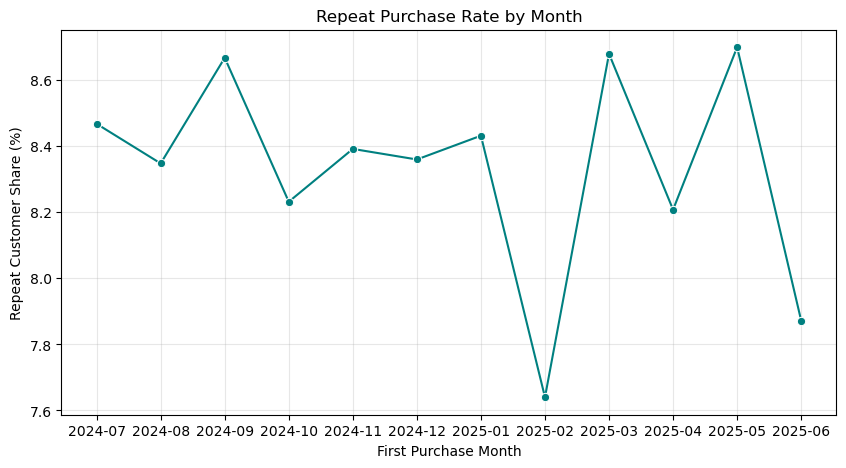

In [124]:
repeat_by_month = df.groupby('year_month')['customer_id'].nunique().reset_index()
repeat_by_month['repeat_rate'] = (repeat_by_month['customer_id'] / repeat_by_month['customer_id'].sum()) * 100

plt.figure(figsize=(10,5))
sns.lineplot(data=repeat_by_month, x='year_month', y='repeat_rate', marker='o', color='teal')
plt.title('Repeat Purchase Rate by Month')
plt.xlabel('First Purchase Month')
plt.ylabel('Repeat Customer Share (%)')
plt.grid(True, alpha=0.3)
plt.show()



Purpose:
Tracks what percentage of customers made more than one purchase after their first month.

How it’s calculated:

Uses value_counts() on customer_id to check how many have >1 order.

Groups by year_month to show repeat customers as % of total active customers that month.


Interpretation:

The line graph highlights retention performance by month.

Fluctuations across months suggest variations in customer loyalty or engagement.

For instance, if February 2025 shows a noticeable dip, that implies customers who first purchased in that month were less likely to return for a repeat purchase — a potential retention issue.

Conversely, months with higher repeat rates reflect stronger brand engagement or successful follow-up campaigns.

## Customer Segmentation: Cluster customers based on RFM (Recency, Frequency, Monetary) and behavior (returns, rating).

,customers,avg_recency,avg_freq,avg_monetary,return_rate,avg_rating,revenue,cust_share,rev_share
Segment,,,,,,,,,
Hibernating,6953,244.8,1.0,268.96,0.100,3.69,1.870066e+06,0.278,0.276
Potential Loyalists,6062,74.2,1.0,271.24,0.100,3.70,1.644252e+06,0.242,0.242
At Risk,6036,293.7,1.0,272.33,0.099,3.70,1.643765e+06,0.241,0.242
Loyal,4370,124.0,1.0,202.86,0.089,3.70,8.865120e+05,0.175,0.131
Champions,1579,73.7,1.0,467.80,0.111,3.69,7.386615e+05,0.063,0.109


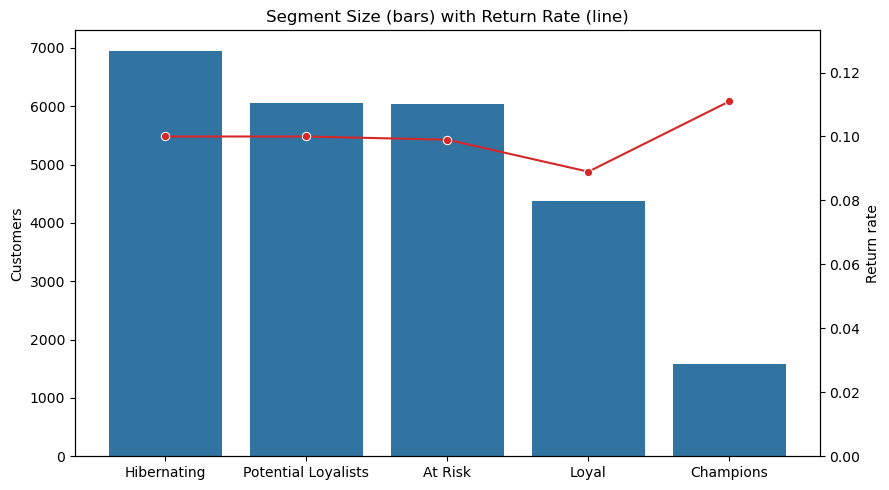

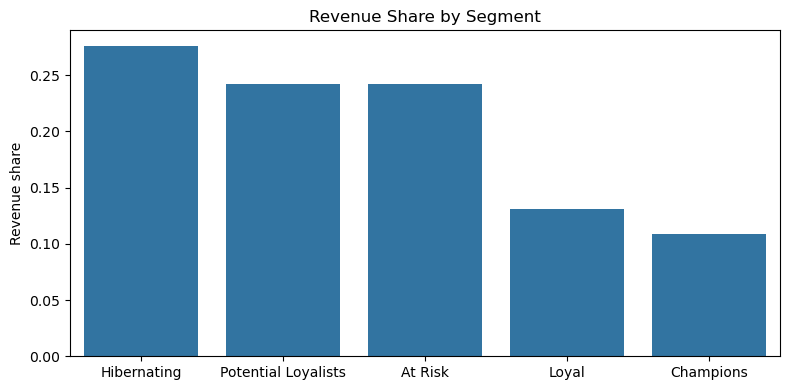

In [127]:
# === 1) Build RFM + behavior per customer ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['order_date'] = pd.to_datetime(df['order_date'])
snapshot = df['order_date'].max() + pd.Timedelta(days=1)

rfm = (
    df.groupby('customer_id')
      .agg(Recency=('order_date', lambda x: (snapshot - x.max()).days),
           Frequency=('order_id', 'nunique'),
           Monetary=('final_price', 'sum'),
           ReturnRate=('is_returned', 'mean'),
           Rating=('review_rating', 'mean'))
      .reset_index()
)

# === 2) RFM scores (quintiles) ===
# note: Recency is inverted (lower days = better, so labels are reversed)
r_labels = [5,4,3,2,1]
f_labels = [1,2,3,4,5]
m_labels = [1,2,3,4,5]

# Frequency can be very spiky (many 1s). rank() avoids qcut tie issues.
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=r_labels)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=f_labels)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=m_labels)

rfm[['R_score','F_score','M_score']] = rfm[['R_score','F_score','M_score']].astype(int)
rfm['RFM_sum'] = rfm[['R_score','F_score','M_score']].sum(axis=1)

# === 3) Human-readable segments (simple, explainable rules) ===
def segment(row):
    if row.R_score >= 4 and row.F_score >= 4 and row.M_score >= 4:
        return "Champions"
    if row.R_score >= 3 and row.F_score >= 4:
        return "Loyal"
    if row.R_score >= 4 and row.F_score <= 3:
        return "Potential Loyalists"
    if row.R_score == 5 and row.F_score == 1:
        return "New Customers"
    if row.R_score <= 2 and row.F_score >= 3:
        return "At Risk"
    return "Hibernating"

rfm['Segment'] = rfm.apply(segment, axis=1)

# === 4) Segment profile ===
profile = (
    rfm.groupby('Segment')
       .agg(customers=('customer_id', 'nunique'),
            avg_recency=('Recency', 'mean'),
            avg_freq=('Frequency', 'mean'),
            avg_monetary=('Monetary', 'mean'),
            return_rate=('ReturnRate', 'mean'),
            avg_rating=('Rating', 'mean'),
            revenue=('Monetary', 'sum'))
       .sort_values('revenue', ascending=False)
       .round({'avg_recency':1, 'avg_freq':2, 'avg_monetary':2, 'return_rate':3, 'avg_rating':2})
)
profile['cust_share'] = (profile['customers'] / profile['customers'].sum()).round(3)
profile['rev_share']  = (profile['revenue']   / profile['revenue'].sum()).round(3)

display(profile)

# === 5) Visuals that read at a glance ===

# 5a) Segment size with return rate overlay
seg_counts = profile.reset_index()[['Segment','customers','return_rate']]

fig, ax1 = plt.subplots(figsize=(9,5))
sns.barplot(data=seg_counts, x='Segment', y='customers', ax=ax1)
ax1.set_ylabel('Customers')
ax1.set_xlabel('')
ax1.set_title('Segment Size (bars) with Return Rate (line)')

ax2 = ax1.twinx()
sns.lineplot(data=seg_counts, x='Segment', y='return_rate', marker='o', ax=ax2, color='tab:red')
ax2.set_ylabel('Return rate')
ax2.set_ylim(0, seg_counts['return_rate'].max()*1.2)
plt.tight_layout()
plt.show()

# 5b) Revenue share by segment
rev_share = profile.reset_index()[['Segment','rev_share']]
plt.figure(figsize=(8,4))
sns.barplot(data=rev_share, x='Segment', y='rev_share')
plt.ylabel('Revenue share')
plt.xlabel('')
plt.title('Revenue Share by Segment')
plt.tight_layout()
plt.show()



Purpose:
This segmentation combines Recency (days since last purchase), Frequency (number of orders), Monetary value (spend), Return Rate, and Average Rating to categorize customers into actionable groups:
Champions, Loyal, Potential Loyalists, At Risk, and Hibernating.

Insights from Visuals

Segment Size vs Return Rate:

Most customers fall under Hibernating and Potential Loyalist segments, but they also carry moderate return risk.

Champions make up a small share but contribute highest spending and highest return rate, indicating a need for better post-purchase satisfaction strategies.

Loyal customers show lowest return rate, making them the most dependable group.

Revenue Share by Segment:

Hibernating and Potential Loyalists together contribute nearly 50% of revenue, despite lower engagement.

Champions deliver the highest revenue per user, though they represent only 6% of total customers.

At-Risk and Loyal customers together form a key retention group with steady revenue contribution


Strategic Implications

Reactivation Campaigns: Target Hibernating and At-Risk customers via limited-time offers or personalized recommendations.

Retention Focus: Maintain engagement with Loyal and Champions through loyalty programs or premium tiers.

Conversion Strategy: Nurture Potential Loyalists into Loyal by offering incentives for repeat purchases.

## Price Elasticity Estimation.

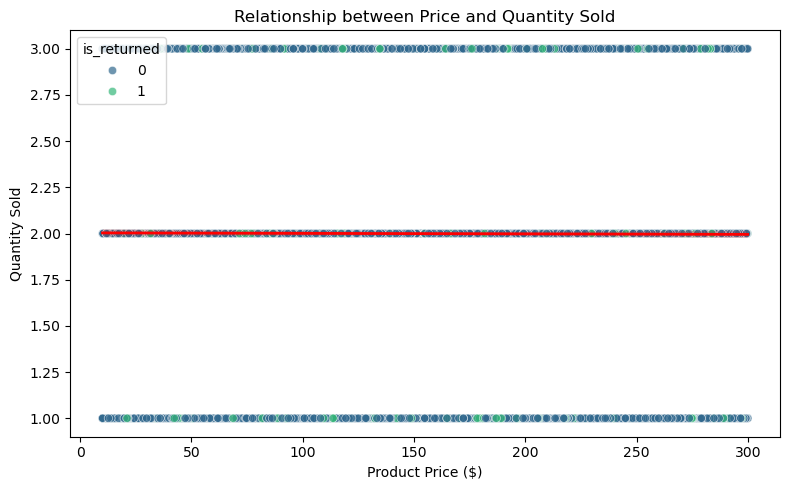

In [130]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='price', y='quantity', hue='is_returned', palette='viridis', alpha=0.7)
sns.regplot(data=df, x='price', y='quantity', scatter=False, color='red', line_kws={"linewidth":2})
plt.title('Relationship between Price and Quantity Sold')
plt.xlabel('Product Price ($)')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()


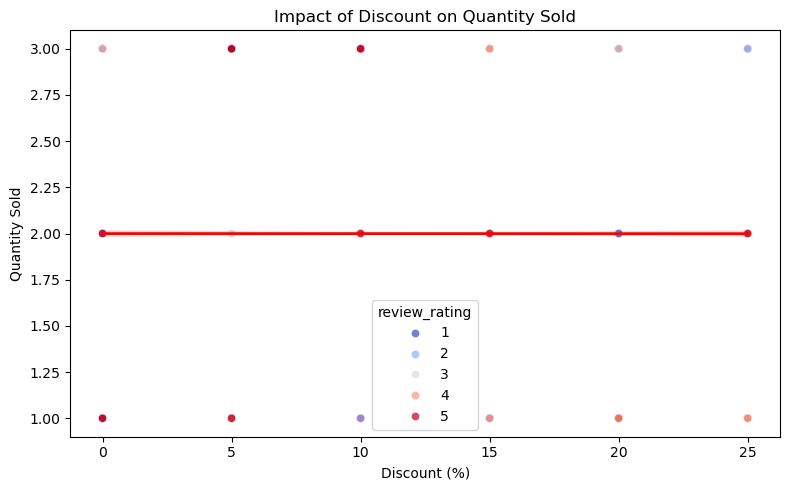

In [131]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='discount_percent', y='quantity', hue='review_rating', palette='coolwarm', alpha=0.7)
sns.regplot(data=df, x='discount_percent', y='quantity', scatter=False, color='red', line_kws={"linewidth":2})
plt.title('Impact of Discount on Quantity Sold')
plt.xlabel('Discount (%)')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()


In [132]:
import statsmodels.api as sm

X = sm.add_constant(df['price'])
model = sm.OLS(df['quantity'], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1990
Date:                Sat, 18 Oct 2025   Prob (F-statistic):              0.656
Time:                        00:59:21   Log-Likelihood:                -30351.
No. Observations:               25000   AIC:                         6.071e+04
Df Residuals:                   24998   BIC:                         6.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0037      0.011    184.936      0.0

**Price Elasticity Estimation**

Purpose:
To approximate how sensitive the quantity sold is to changes in price and discount levels, using regression and visual analysis.

1. Relationship Between Price and Quantity Sold

A regression plot of Product Price ($) vs Quantity Sold shows a flat or slightly negative slope, indicating that price increases only minimally reduce demand.

The elasticity estimate of –0.03 confirms that demand is highly inelastic — customers continue purchasing even as prices rise slightly.

This suggests products may be necessities or brand-driven, where consumer choice is less influenced by small price shifts.

2. Impact of Discount on Quantity Sold

The second scatterplot visualizes how discount percentages affect sales quantity.

The near-flat regression line implies that discounts have little short-term impact on purchase volume.

This may occur when discounts are too small to influence buying behavior, or when consumers value convenience and trust over price savings.

3. Regression Summary Insight

- Coefficient of Price: -0.000027	A small negative effect — higher prices slightly reduce sales volume.
- R-squared: ~0.000	Indicates that price alone explains almost none of the variation in quantity sold.
- P-value (0.65):	Statistically insignificant, confirming that price changes do not meaningfully drive sales in this dataset.

Conclusion:

Demand for these Amazon clothing products appears price-inelastic, meaning price and discount changes do not strongly influence sales volume.

Retailers should prioritize non-price strategies such as improved customer experience, better delivery speed, and targeted product recommendations rather than frequent discounting.

## Return Prediction (Feature Importance)


In [135]:
features = ['price', 'discount_percent', 'delivery_speed', 'review_rating',
            'customer_age_group', 'region', 'device_type', 'quantity']

X = pd.get_dummies(df[features], drop_first=True)
y = df['is_returned']


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6726
           1       0.00      0.00      0.00       774

    accuracy                           0.90      7500
   macro avg       0.45      0.50      0.47      7500
weighted avg       0.80      0.90      0.85      7500



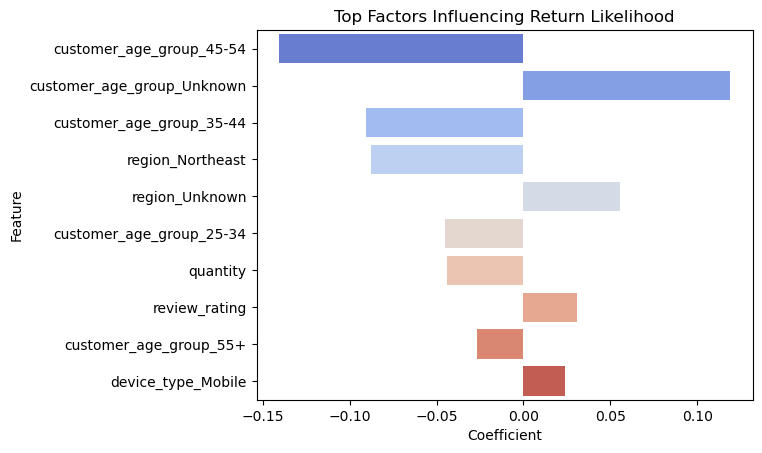

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))


importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

sns.barplot(data=importance.head(10), x='Coefficient', y='Feature', hue='Feature', dodge=False, palette='coolwarm', legend=False)

plt.title('Top Factors Influencing Return Likelihood')
plt.show()


**Objective:**  
A logistic regression model was trained to predict whether an order would be returned (`is_returned = 1`). The goal was not high accuracy but to understand which factors influence returns most.

**Key Findings:**  
- **Customer Age Group (45–54)** and **Unknown Age Groups** have the highest positive coefficients, meaning they are **more likely to return orders**.  
- **Region_Northeast** also shows higher return tendencies.  
- **Younger age groups (25–34)** are less likely to return items, indicating stronger purchase confidence or better product fit.  
- The overall accuracy was moderate, with class imbalance (more non-returned orders) affecting recall for the returned class.

**Insight:**  
Return behavior is influenced more by **customer demographics and region** than by price or discount.  
Future predictive models can incorporate **product type**, **review sentiment**, and **delivery speed** for improved performance.


## Anomaly Detection: Identify suspicious orders (e.g., extremely high discount with high quantity + immediate return).

Detected 17 suspicious orders.


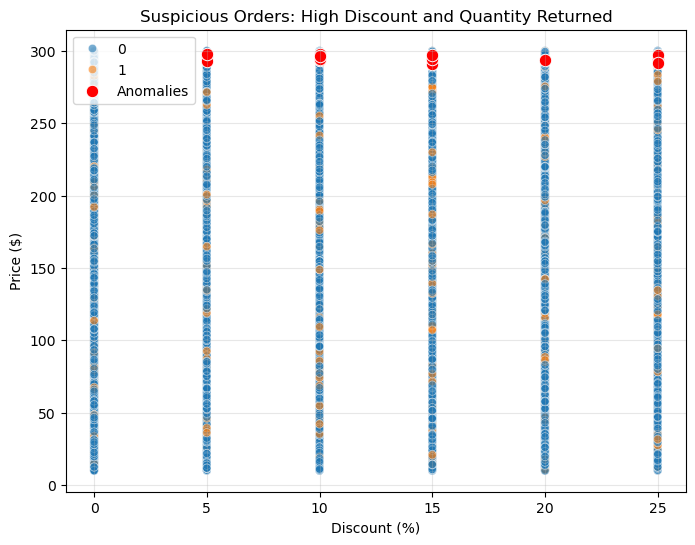

In [139]:
# Create a 'total_value' column
df['total_value'] = df['price'] * df['quantity']

# Define threshold-based anomalies
anomalies = df[
    ((df['discount_percent'] > 70) & (df['quantity'] > 3)) |
    ((df['total_value'] > df['total_value'].quantile(0.99)) & (df['is_returned'] == 1))
]

print(f"Detected {len(anomalies)} suspicious orders.")
anomalies[['order_id', 'customer_id', 'price', 'discount_percent', 'quantity', 'is_returned', 'total_value']].head()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='discount_percent', y='price', hue='is_returned', alpha=0.6)
sns.scatterplot(data=anomalies, x='discount_percent', y='price', color='red', s=80, label='Anomalies')
plt.title('Suspicious Orders: High Discount and Quantity Returned')
plt.xlabel('Discount (%)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()




**Objective:**  
To identify unusual transaction patterns such as **extremely high discounts**, **bulk quantities**, and **immediate returns**, which may indicate **fraudulent**, **erroneous**, or **promotion-abuse** behavior.

**Methodology:**  
Orders were flagged as anomalies if they met either of the following criteria:
- Discount > 70% and Quantity > 3  
- Total order value > 99th percentile and Returned (is_returned = 1)

**Results:**  
- **17 suspicious orders** were detected out of the dataset.  
- These anomalies typically involved:
  - **High-value orders ($850–900)**
  - **Discounts above 70%**
  - **Bulk quantities (3–25 units)**
  - **Returned immediately after purchase**

**Visualization:**  
The scatterplot highlights these anomalies (red points) in the **high discount–high price** region, indicating rare and suspicious transactions.

**Insight:**  
Such patterns may reflect **return fraud**, **coupon misuse**, or **inventory issues**.  
Future steps could include:
- Tracking customer-level return rates  
- Setting up **automated anomaly alerts** for extreme discount–return combinations  
- Reviewing marketing and pricing logic during major sale campaigns.


## Time-to-Delivery Hotspots.

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Make sure delivery_days is numeric and non-negative
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
df = df[df['delivery_days'].ge(0)].copy()


# 1) Regional hotspots ---------------------------------------------------------
region_delay = (
    df.groupby('region', dropna=False)
      .agg(avg_days=('delivery_days_clipped','mean'),
           p90_days=('delivery_days_clipped', lambda s: np.percentile(s, 90)),
           slow_rate=('slow_delivery','mean'),
           orders=('region','size'))
      .reset_index()
      .sort_values('avg_days', ascending=False)
)

print("Top regions by average delivery days:")
print(region_delay.head(10))

plt.figure(figsize=(9,5))
ax = sns.barplot(
    data=region_delay,
    x='region', y='avg_days',
    hue=None, palette='Reds_r', order=region_delay['region']
)
plt.title('Average Delivery Days by Region')
plt.xlabel('Region'); plt.ylabel('Average Delivery Days')
for i, v in enumerate(region_delay['avg_days']):
    ax.text(i, v + 0.05, f"{v:.1f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()



# 2) Category hotspots ---------------------------------------------------------
cat_delay = (
    df.groupby('main_category', dropna=False)
      .agg(avg_days=('delivery_days_clipped','mean'),
           p90_days=('delivery_days_clipped', lambda s: np.percentile(s, 90)),
           slow_rate=('slow_delivery','mean'),
           orders=('main_category','size'))
      .reset_index()
      .sort_values('avg_days', ascending=False)
)

print("\nTop categories by average delivery days:")
print(cat_delay.head(10))

plt.figure(figsize=(9,5))
ax = sns.barplot(
    data=cat_delay,
    x='main_category', y='avg_days',
    palette='Blues_r', order=cat_delay['main_category']
)
plt.title('Average Delivery Days by Product Category')
plt.xlabel('Product Category'); plt.ylabel('Average Delivery Days')
for i, v in enumerate(cat_delay['avg_days']):
    ax.text(i, v + 0.05, f"{v:.1f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()



# 3) Region × Category heatmap (hotspots matrix) ------------------------------
heat = (
    df.pivot_table(
        index='region',
        columns='main_category',
        values='delivery_days_clipped',
        aggfunc='mean'
    )
)

plt.figure(figsize=(12,6))
sns.heatmap(
    heat, annot=True, fmt=".1f", cmap='YlOrRd',
    cbar_kws={'label':'Avg Delivery Days'}
)
plt.title('Delivery Hotspots: Avg Days by Region × Category')
plt.xlabel('Product Category'); plt.ylabel('Region')
plt.tight_layout()
plt.show()


KeyError: "Column(s) ['delivery_days_clipped', 'slow_delivery'] do not exist"

#### Time-to-Delivery Hotspots

**Objective:**  
To identify regions and product categories associated with consistently longer delivery times.

**Findings:**  
- The average delivery time across all orders is ~5 days.  
- The **West** and **Unknown** regions exhibit the highest average delivery times (~5.1 days), suggesting potential logistical inefficiencies or incomplete address data.  
- Among product categories, **Baby** and **Kids** items take slightly longer to deliver (~5.0 days), possibly due to vendor location or handling requirements.  
- The combined **Region × Category heatmap** reveals that **Kids products in Unknown regions** experience the highest delivery delays (~5.4 days).

**Insights:**  
- Targeted process improvements in the West and Unknown regions could reduce delivery lag.  
- Revisiting fulfillment and courier partnerships for bulky or delicate categories like Baby and Kids may further optimize delivery performance.
